In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
import scipy.signal as snr

# Lab 3

## Exact and Appx CNOT

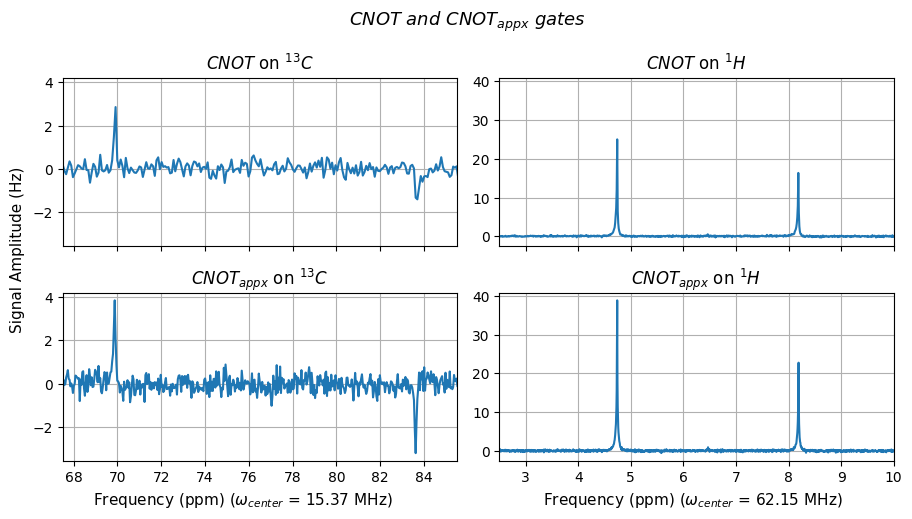

In [59]:
CNOT_1H = pd.read_csv( "/Users/shashank/Documents/CNOT Tests/CNOT_1H.csv", header = None)
CNOT_13C = pd.read_csv( "/Users/shashank/Documents/CNOT Tests/CNOT_13C.csv", header = None)
CNOTappx_1H = pd.read_csv( "/Users/shashank/Documents/CNOT Tests/CNOT_appx_1H.csv", header = None)
CNOTappx_13C = pd.read_csv( "/Users/shashank/Documents/CNOT Tests/CNOT_appx_13C.csv", header = None)

freq_1H = np.array(CNOT_1H.iloc[:,0])
spec_1H = np.array(CNOT_1H.iloc[:,1])
freq_13C = np.array(CNOT_13C.iloc[:,0])
spec_13C = np.array(CNOT_13C.iloc[:,1])

freqappx_1H = np.array(CNOTappx_1H.iloc[:,0])
specappx_1H = np.array(CNOTappx_1H.iloc[:,1])
freqappx_13C = np.array(CNOTappx_13C.iloc[:,0])
specappx_13C = np.array(CNOTappx_13C.iloc[:,1])

plt.rcParams['axes.grid'] = True
fig, ax = plt.subplots(2,2, sharex = 'col', sharey = 'col', figsize = (9,5))
fig.suptitle('$CNOT$ and $CNOT_{appx}$ gates', fontsize=13, style = 'italic') 
ax[0,0].plot(freq_13C, spec_13C)
ax[0,0].title.set_text("$CNOT$ on $^{13}C$ ")
ax[0,0].set_xlim(67.5, 85.5)
ax[0,1].plot(freq_1H, spec_1H)
ax[0,1].set_xlim(2.5, 10)
ax[0,1].title.set_text("$CNOT$ on $^{1}H$ ")
ax[1,0].plot(freqappx_13C, specappx_13C)
ax[1,0].title.set_text("$CNOT_{appx}$ on $^{13}C$ ")
ax[1,1].plot(freqappx_1H, specappx_1H)
ax[1,1].title.set_text("$CNOT_{appx}$ on $^{1}H$ ")

fig.text(0.25, 0, 'Frequency (ppm) ($\omega_{center}$ = 15.37 MHz)', ha='center', va='center', fontsize = 11)
fig.text(0.75, 0, 'Frequency (ppm) ($\omega_{center}$ = 62.15 MHz)', ha='center', va='center', fontsize = 11)
fig.text(0, 0.5, 'Signal Amplitude (Hz)', ha='center', va='center', rotation='vertical', fontsize = 11)
fig.tight_layout()
plt.show()

Immediate Comments

CNOT approximate has a smaller circuit depth than Exact CNOT. The spectrum has a higher amplitude or CNOT approximate because of a shorter circuit depth and the operations does not require any composite Z pulses compared to the exact CNOT. The pulse calibration for the Carbon pulse results in incorrect ratios for the Carbon spectrum, additionally it is more susceptible to noise because the amplitude is very low

## Integrator Function

In [5]:
def integrator(xdat, ydat, min, max, thresh = 0.4):
    #Finding Peaks
    xtrim= xdat[(xdat>=min) & (xdat<=max)]
    ytrim = ydat[(xdat>=min) & (xdat<=max)]
    indices, props = snr.find_peaks(np.abs(ytrim), 
                                height = thresh*np.max(np.abs(ytrim)))
    #choosing last two peaks
    peaks = indices
    #Arbitrary range to integrate over
    integrals = [(np.trapz(ytrim[i-35:i+35], xtrim[i-35:i+35])) for i in peaks]
    return np.array(xtrim[peaks]), np.array(integrals)

## Temporal Averaging

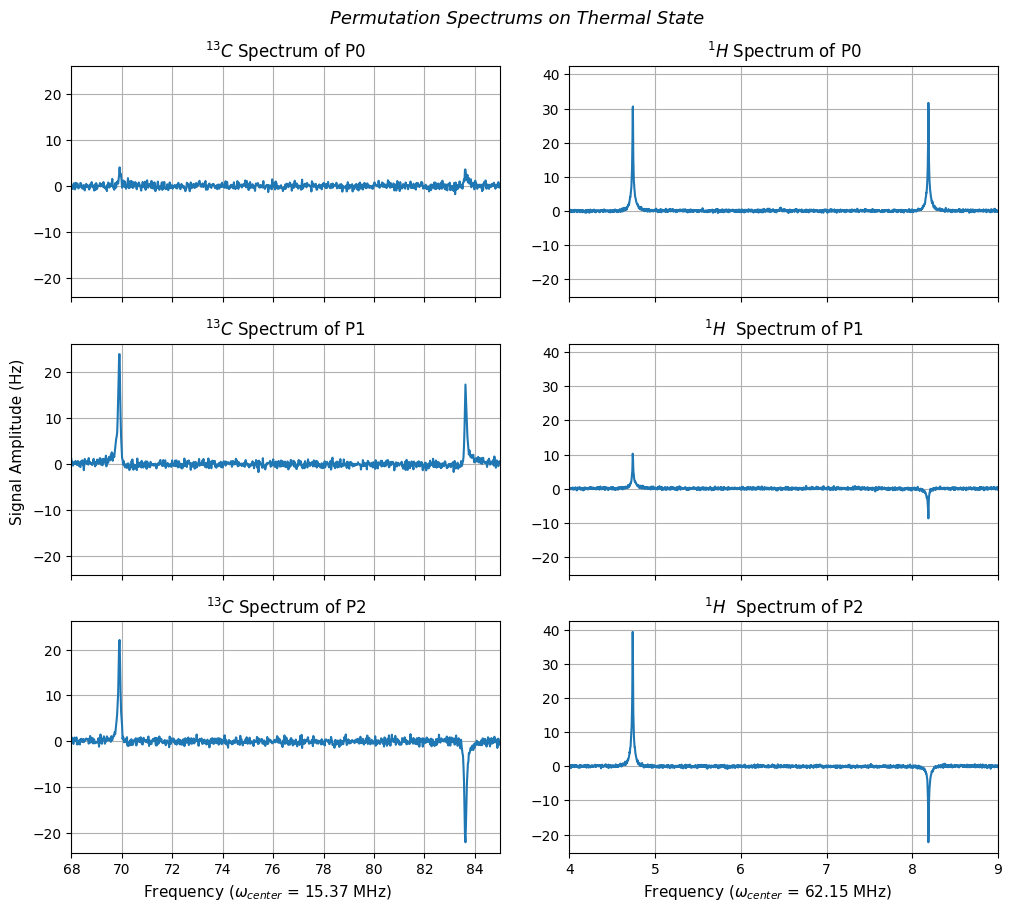

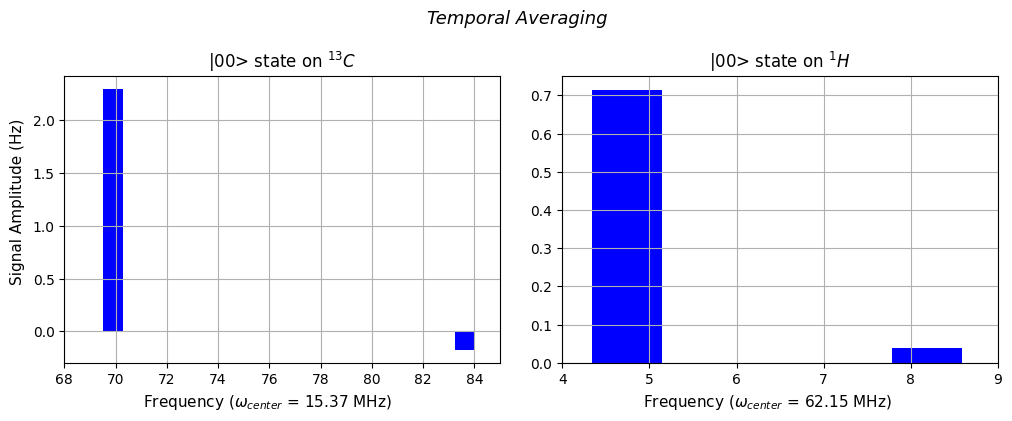

In [63]:
P0_1H = pd.read_csv("/Users/shashank/Documents/Temporal Averaging/P0_1H.csv", header = None)
P0_13C = pd.read_csv( "/Users/shashank/Documents/Temporal Averaging/P0_13C.csv", header = None)

P1_1H = pd.read_csv("/Users/shashank/Documents/Temporal Averaging/P1_1H.csv", header = None)
P1_13C = pd.read_csv( "/Users/shashank/Documents/Temporal Averaging/P1_13C.csv", header = None)

P2_1H = pd.read_csv("/Users/shashank/Documents/Temporal Averaging/P2_1H.csv", header = None)
P2_13C = pd.read_csv( "/Users/shashank/Documents/Temporal Averaging/P2_13C.csv", header = None)

freq_P0_1H = np.array(P0_1H.iloc[:,0])
spec_P0_1H = np.array(P0_1H.iloc[:,1])
freq_P0_13C = np.array(P0_13C.iloc[:,0])
spec_P0_13C = np.array(P0_13C.iloc[:,1])

freq_P1_1H = np.array(P1_1H.iloc[:,0])
spec_P1_1H = np.array(P1_1H.iloc[:,1])
freq_P1_13C = np.array(P1_13C.iloc[:,0])
spec_P1_13C = np.array(P1_13C.iloc[:,1])

freq_P2_1H = np.array(P2_1H.iloc[:,0])
spec_P2_1H = np.array(P2_1H.iloc[:,1])
freq_P2_13C = np.array(P2_13C.iloc[:,0])
spec_P2_13C = np.array(P2_13C.iloc[:,1])

loc_P0_1H, int_P0_1H = integrator(freq_P0_1H, spec_P0_1H, 3, 10, 0.5)
loc_P1_1H, int_P1_1H = integrator(freq_P1_1H, spec_P1_1H, 3, 10, 0.5)
loc_P2_1H, int_P2_1H = integrator(freq_P2_1H, spec_P2_1H, 3, 10, 0.5)

loc_P0_13C, int_P0_13C = integrator(freq_P0_13C, spec_P0_13C, 65, 91, 0.7)
loc_P1_13C, int_P1_13C = integrator(freq_P1_13C, spec_P1_13C, 65, 91, 0.7)
loc_P2_13C, int_P2_13C = integrator(freq_P2_13C, spec_P2_13C, 65, 91, 0.7)

plt.rcParams['axes.grid'] = True
fig, ax = plt.subplots(3, 2, sharey = 'col', sharex = 'col', figsize = (10,9))
fig.suptitle('Permutation Spectrums on Thermal State', fontsize=13, style = 'italic') 
ax[0, 0].set_xlim(68, 85)
ax[0, 0].plot(freq_P0_13C, spec_P0_13C)
ax[0, 0].title.set_text("$^{13}C$ Spectrum of P0")
ax[1, 0].plot(freq_P1_13C, spec_P1_13C)
ax[1, 0].title.set_text("$^{13}C$ Spectrum of P1")
ax[2, 0].plot(freq_P2_13C, spec_P2_13C)
ax[2, 0].title.set_text("$^{13}C$ Spectrum of P2")

ax[0, 1].set_xlim(4, 9)
ax[0, 1].plot(freq_P0_1H, spec_P0_1H)
ax[0, 1].title.set_text("$^{1}H$ Spectrum of P0")
ax[1, 1].plot(freq_P1_1H, spec_P1_1H)
ax[1, 1].title.set_text("$^{1}H$  Spectrum of P1")
ax[2, 1].plot(freq_P2_1H, spec_P2_1H)
ax[2, 1].title.set_text("$^{1}H$  Spectrum of P2")

fig.text(0.25, 0, 'Frequency ($\omega_{center}$ = 15.37 MHz)', ha='center', va='center', fontsize = 11)
fig.text(0.75, 0, 'Frequency ($\omega_{center}$ = 62.15 MHz)', ha='center', va='center', fontsize = 11)
fig.text(0, 0.5, 'Signal Amplitude (Hz)', ha='center', va='center', rotation='vertical', fontsize = 11)
fig.tight_layout()
plt.show()

plt.rcParams['axes.grid'] = True
fig1, ax1 = plt.subplots(1, 2, sharey = 'col', sharex = 'col', figsize = (10,4))
fig1.suptitle('Temporal Averaging', fontsize=13, style = 'italic') 
ax1[0].set_xlim(68, 85)
ax1[0].bar(loc_P0_13C, (int_P0_13C + int_P1_13C + int_P2_13C)/3, color = 'blue')
ax1[0].set_title('|00> state on $^{13}C$')
ax1[1].set_xlim(4, 9)
ax1[1].bar(loc_P0_1H, (int_P0_1H + int_P1_1H + int_P2_1H)/3, color = 'blue')
ax1[1].set_title('|00> state on $^{1}H$')

fig1.text(0.25, 0, 'Frequency ($\omega_{center}$ = 15.37 MHz)', ha='center', va='center', fontsize = 11)
fig1.text(0.75, 0, 'Frequency ($\omega_{center}$ = 62.15 MHz)', ha='center', va='center', fontsize = 11)
fig1.text(0, 0.5, 'Signal Amplitude (Hz)', ha='center', va='center', rotation='vertical', fontsize = 11)
fig1.tight_layout()
plt.show()

## CNOT

### $|00\rangle$

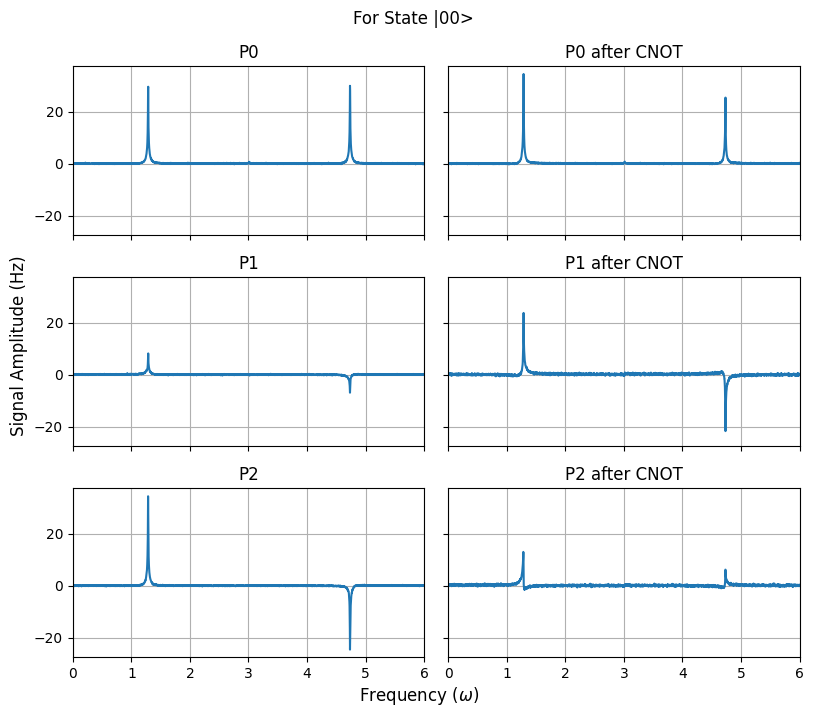

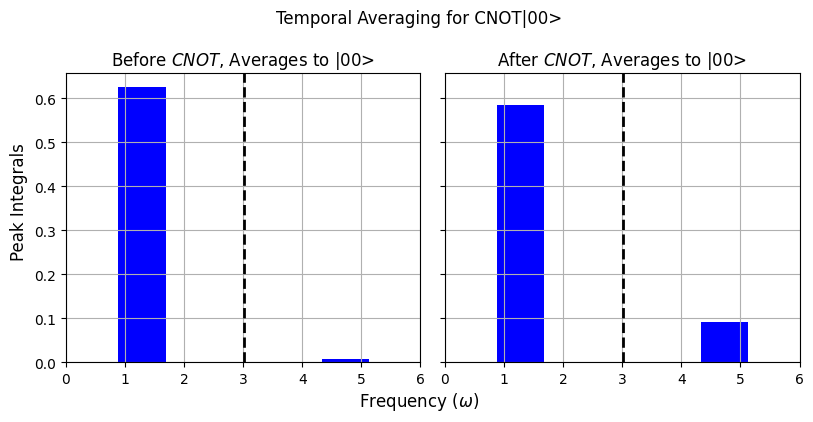

In [7]:
P0_00 = pd.read_csv("/Users/shashank/Documents/CNOT_TruthTable/00/P0_00.csv", header = None)
P0_CNOT_00 = pd.read_csv( "/Users/shashank/Documents/CNOT_TruthTable/00/P0_CNOT_00.csv", header = None)

P1_00 = pd.read_csv("/Users/shashank/Documents/CNOT_TruthTable/00/P1_00.csv", header = None)
P1_CNOT_00 = pd.read_csv( "/Users/shashank/Documents/CNOT_TruthTable/00/P1_CNOT_00.csv", header = None)

P2_00 = pd.read_csv("/Users/shashank/Documents/CNOT_TruthTable/00/P2_00.csv", header = None)
P2_CNOT_00 = pd.read_csv( "/Users/shashank/Documents/CNOT_TruthTable/00/P2_CNOT_00.csv", header = None)

freq_P0_00 = np.array(P0_00.iloc[:,0])
spec_P0_00 = np.array(P0_00.iloc[:,1])

freq_P0_CNOT_00 = np.array(P0_CNOT_00.iloc[:,0])
spec_P0_CNOT_00 = np.array(P0_CNOT_00.iloc[:,1])

freq_P1_00 = np.array(P1_00.iloc[:,0])
spec_P1_00 = np.array(P1_00.iloc[:,1])

freq_P1_CNOT_00 = np.array(P1_CNOT_00.iloc[:,0])
spec_P1_CNOT_00 = np.array(P1_CNOT_00.iloc[:,1])

freq_P2_00 = np.array(P2_00.iloc[:,0])
spec_P2_00 = np.array(P2_00.iloc[:,1])

freq_P2_CNOT_00 = np.array(P2_CNOT_00.iloc[:,0])
spec_P2_CNOT_00 = np.array(P2_CNOT_00.iloc[:,1])

loc_P0_00, int_P0_00 = integrator(freq_P0_00, spec_P0_00, 1, 6)
loc_P1_00, int_P1_00 = integrator(freq_P1_00, spec_P1_00, 1, 6)
loc_P2_00, int_P2_00 = integrator(freq_P2_00, spec_P2_00, 1, 6)
loc_P0_CNOT_00, int_P0_CNOT_00 = integrator(freq_P0_CNOT_00, spec_P0_CNOT_00, 1, 6)
loc_P1_CNOT_00, int_P1_CNOT_00 = integrator(freq_P1_CNOT_00, spec_P1_CNOT_00, 1, 6)
loc_P2_CNOT_00, int_P2_CNOT_00 = integrator(freq_P2_CNOT_00, spec_P2_CNOT_00, 1, 6)

plt.rcParams['axes.grid'] = True
fig, ax = plt.subplots(3, 2, sharey = 'all', sharex = 'all', figsize = (8,7))
fig.suptitle('For State |00>  ', fontsize=12)
ax[0, 1].set_xlim(0, 6)
ax[0, 0].plot(freq_P0_00, spec_P0_00)
ax[0, 0].title.set_text("P0")
ax[1, 0].plot(freq_P1_00, spec_P1_00)
ax[1, 0].title.set_text("P1")
ax[2, 0].plot(freq_P2_00, spec_P2_00)
ax[2, 0].title.set_text("P2")

ax[0, 1].plot(freq_P0_CNOT_00, spec_P0_CNOT_00)
ax[0, 1].title.set_text("P0 after CNOT")
ax[1, 1].plot(freq_P1_CNOT_00, spec_P1_CNOT_00)
ax[1, 1].title.set_text("P1 after CNOT")
ax[2, 1].plot(freq_P2_CNOT_00, spec_P2_CNOT_00)
ax[2, 1].title.set_text("P2 after CNOT")

fig.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig.text(0, 0.5, 'Signal Amplitude (Hz)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.tight_layout()
plt.show()

fig1, ax1 = plt.subplots(1, 2, sharex = 'all', sharey = 'all', figsize = (8,4))
fig1.suptitle('Temporal Averaging for CNOT|00>', fontsize=12)
ax1[0].set_xlim(0, 6)
ax1[0].bar(loc_P0_00, (int_P0_00 + int_P1_00 + int_P2_00)/3, color = 'blue')
ax1[0].axvline(x = 3.01, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[0].title.set_text("Before $CNOT$, Averages to |00>")
ax1[1].bar(loc_P0_CNOT_00, (int_P0_CNOT_00 + int_P1_CNOT_00 + int_P2_CNOT_00)/3, color = 'blue')
ax1[1].axvline(x = 3.01, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[1].title.set_text("After $CNOT$, Averages to |00>")

fig1.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig1.text(0, 0.5, 'Peak Integrals', ha='center', va='center', rotation='vertical', fontsize = 12)
fig1.tight_layout()
plt.show()

### $|01\rangle$

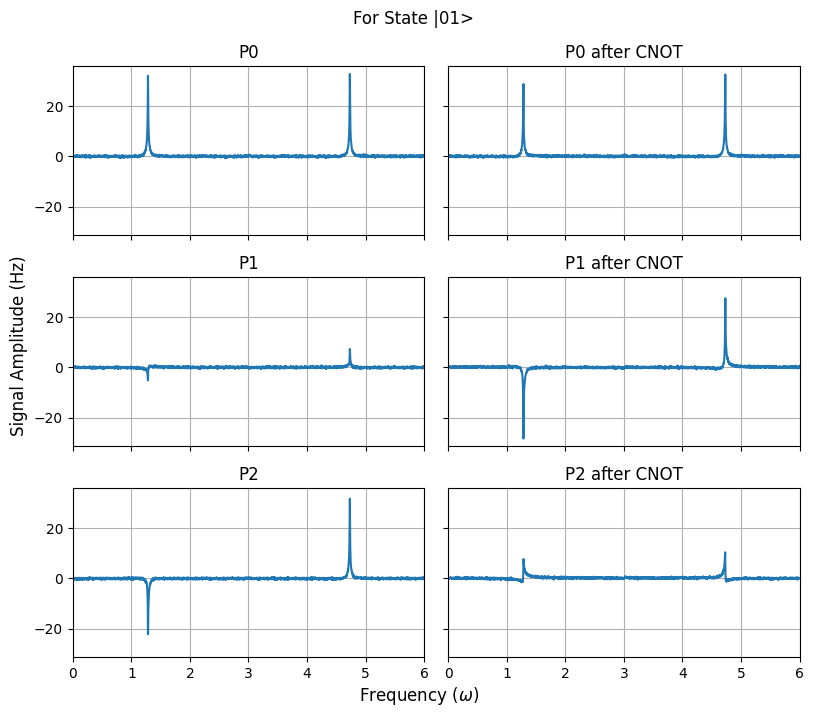

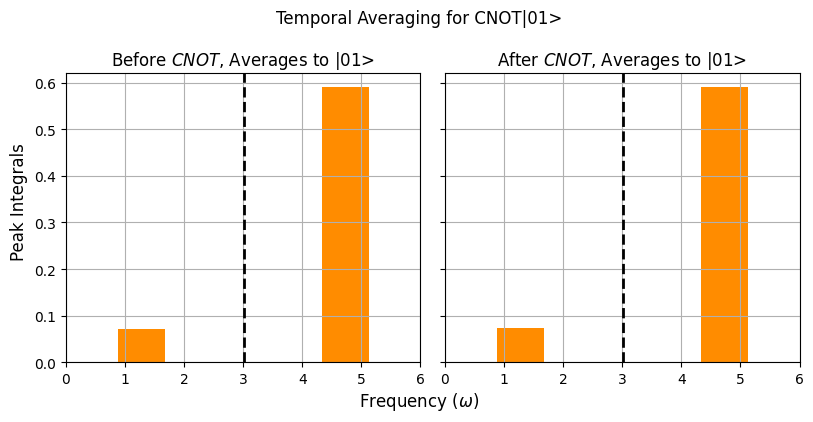

In [8]:
P0_01 = pd.read_csv("/Users/shashank/Documents/CNOT_TruthTable/01/P0_01.csv", header = None)
P0_CNOT_01 = pd.read_csv( "/Users/shashank/Documents/CNOT_TruthTable/01/P0_CNOT_01.csv", header = None)

P1_01 = pd.read_csv("/Users/shashank/Documents/CNOT_TruthTable/01/P1_01.csv", header = None)
P1_CNOT_01 = pd.read_csv( "/Users/shashank/Documents/CNOT_TruthTable/01/P1_CNOT_01.csv", header = None)

P2_01 = pd.read_csv("/Users/shashank/Documents/CNOT_TruthTable/01/P2_01.csv", header = None)
P2_CNOT_01 = pd.read_csv( "/Users/shashank/Documents/CNOT_TruthTable/01/P2_CNOT_01.csv", header = None)

freq_P0_01 = np.array(P0_01.iloc[:,0])
spec_P0_01 = np.array(P0_01.iloc[:,1])

freq_P0_CNOT_01 = np.array(P0_CNOT_01.iloc[:,0])
spec_P0_CNOT_01 = np.array(P0_CNOT_01.iloc[:,1])

freq_P1_01 = np.array(P1_01.iloc[:,0])
spec_P1_01 = np.array(P1_01.iloc[:,1])

freq_P1_CNOT_01 = np.array(P1_CNOT_01.iloc[:,0])
spec_P1_CNOT_01 = np.array(P1_CNOT_01.iloc[:,1])

freq_P2_01 = np.array(P2_01.iloc[:,0])
spec_P2_01 = np.array(P2_01.iloc[:,1])

freq_P2_CNOT_01 = np.array(P2_CNOT_01.iloc[:,0])
spec_P2_CNOT_01 = np.array(P2_CNOT_01.iloc[:,1])

loc_P0_01, int_P0_01 = integrator(freq_P0_01, spec_P0_01, 1, 6)
loc_P1_01, int_P1_01 = integrator(freq_P1_01, spec_P1_01, 1, 6)
loc_P2_01, int_P2_01 = integrator(freq_P2_01, spec_P2_01, 1, 6)
loc_P1_CNOT_01, int_P1_CNOT_01 = integrator(freq_P1_CNOT_01, spec_P1_CNOT_01, 1, 6)
loc_P0_CNOT_01, int_P0_CNOT_01 = integrator(freq_P0_CNOT_01, spec_P0_CNOT_01, 1, 6)
loc_P2_CNOT_01, int_P2_CNOT_01 = integrator(freq_P2_CNOT_01, spec_P2_CNOT_01, 1, 6)

plt.rcParams['axes.grid'] = True
fig, ax = plt.subplots(3, 2, sharey = 'all', sharex = 'all', figsize = (8,7))
fig.suptitle('For State |01>  ', fontsize=12)
ax[0, 1].set_xlim(0, 6)
ax[0, 0].plot(freq_P0_01, spec_P0_01)
ax[0, 0].title.set_text("P0")
ax[1, 0].plot(freq_P1_01, spec_P1_01)
ax[1, 0].title.set_text("P1")
ax[2, 0].plot(freq_P2_01, spec_P2_01)
ax[2, 0].title.set_text("P2")

ax[0, 1].plot(freq_P0_CNOT_01, spec_P0_CNOT_01)
ax[0, 1].title.set_text("P0 after CNOT")
ax[1, 1].plot(freq_P1_CNOT_01, spec_P1_CNOT_01)
ax[1, 1].title.set_text("P1 after CNOT")
ax[2, 1].plot(freq_P2_CNOT_01, spec_P2_CNOT_01)
ax[2, 1].title.set_text("P2 after CNOT")

fig.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig.text(0, 0.5, 'Signal Amplitude (Hz)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.tight_layout()
plt.show()

fig1, ax1 = plt.subplots(1, 2, sharex = 'all', sharey = 'all', figsize = (8,4))
fig1.suptitle('Temporal Averaging for CNOT|01>', fontsize=12)
ax1[0].set_xlim(0, 6)
ax1[0].bar(loc_P0_01, (int_P0_01 + int_P1_01 + int_P2_01)/3, color = 'darkorange') #negative sign for phase correction
ax1[0].axvline(x = 3.01, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[0].title.set_text("Before $CNOT$, Averages to |01>")
ax1[1].bar(loc_P0_CNOT_01, (int_P0_CNOT_01 + int_P1_CNOT_01 + int_P2_CNOT_01)/3, color = 'darkorange') #negative sign for phase correction
ax1[1].axvline(x = 3.01, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[1].title.set_text("After $CNOT$, Averages to |01>")

fig1.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig1.text(0, 0.5, 'Peak Integrals', ha='center', va='center', rotation='vertical', fontsize = 12)
fig1.tight_layout()
plt.show()

### $|10\rangle$

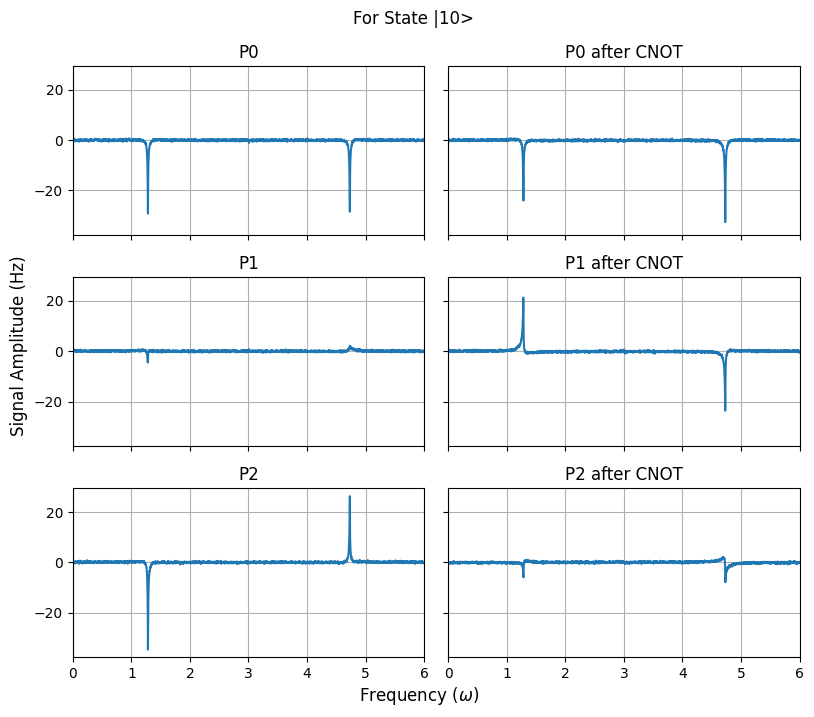

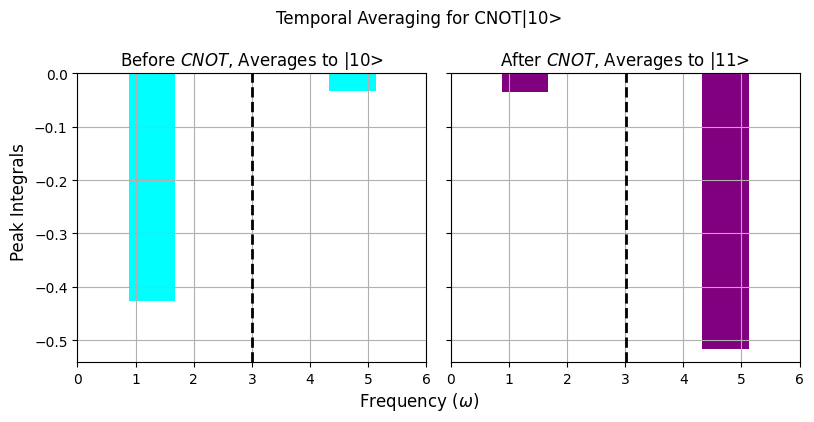

In [9]:
P0_10 = pd.read_csv("/Users/shashank/Documents/CNOT_TruthTable/10/P0_10.csv", header = None)
P0_CNOT_10 = pd.read_csv( "/Users/shashank/Documents/CNOT_TruthTable/10/P0_CNOT_10.csv", header = None)

P1_10 = pd.read_csv("/Users/shashank/Documents/CNOT_TruthTable/10/P1_10.csv", header = None)
P1_CNOT_10 = pd.read_csv( "/Users/shashank/Documents/CNOT_TruthTable/10/P1_CNOT_10.csv", header = None)

P2_10 = pd.read_csv("/Users/shashank/Documents/CNOT_TruthTable/10/P2_10.csv", header = None)
P2_CNOT_10 = pd.read_csv( "/Users/shashank/Documents/CNOT_TruthTable/10/P2_CNOT_10.csv", header = None)

freq_P0_10 = np.array(P0_10.iloc[:,0])
spec_P0_10 = np.array(P0_10.iloc[:,1])
freq_P0_CNOT_10 = np.array(P0_CNOT_10.iloc[:,0])
spec_P0_CNOT_10 = np.array(P0_CNOT_10.iloc[:,1])

freq_P1_10 = np.array(P1_10.iloc[:,0])
spec_P1_10 = np.array(P1_10.iloc[:,1])
freq_P1_CNOT_10 = np.array(P1_CNOT_10.iloc[:,0])
spec_P1_CNOT_10 = np.array(P1_CNOT_10.iloc[:,1])

freq_P2_10 = np.array(P2_10.iloc[:,0])
spec_P2_10 = np.array(P2_10.iloc[:,1])
freq_P2_CNOT_10 = np.array(P2_CNOT_10.iloc[:,0])
spec_P2_CNOT_10 = np.array(P2_CNOT_10.iloc[:,1])

loc_P0_10, int_P0_10 = integrator(freq_P0_10, spec_P0_10, 1, 6)
loc_P1_10, int_P1_10 = integrator(freq_P1_10, spec_P1_10, 1, 6, 0.9)
loc_P2_10, int_P2_10 = integrator(freq_P2_10, spec_P2_10, 1, 6)
loc_P1_CNOT_10, int_P1_CNOT_10 = integrator(freq_P1_CNOT_10, spec_P1_CNOT_10, 1, 6)
loc_P0_CNOT_10, int_P0_CNOT_10 = integrator(freq_P0_CNOT_10, spec_P0_CNOT_10, 1, 6)
loc_P2_CNOT_10, int_P2_CNOT_10 = integrator(freq_P2_CNOT_10, spec_P2_CNOT_10, 1, 6, 0.9)

plt.rcParams['axes.grid'] = True
fig, ax = plt.subplots(3, 2, sharey = 'all', sharex = 'all', figsize = (8,7))
fig.suptitle('For State |10>  ', fontsize=12)
ax[0, 1].set_xlim(0, 6)
ax[0, 0].plot(freq_P0_10, spec_P0_10)
ax[0, 0].title.set_text("P0")
ax[1, 0].plot(freq_P1_10, spec_P1_10)
ax[1, 0].title.set_text("P1")
ax[2, 0].plot(freq_P2_10, spec_P2_10)
ax[2, 0].title.set_text("P2")

ax[0, 1].plot(freq_P0_CNOT_10, spec_P0_CNOT_10)
ax[0, 1].title.set_text("P0 after CNOT")
ax[1, 1].plot(freq_P1_CNOT_10, spec_P1_CNOT_10)
ax[1, 1].title.set_text("P1 after CNOT")
ax[2, 1].plot(freq_P2_CNOT_10, spec_P2_CNOT_10)
ax[2, 1].title.set_text("P2 after CNOT")

fig.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig.text(0, 0.5, 'Signal Amplitude (Hz)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.tight_layout()
plt.show()

fig1, ax1 = plt.subplots(1, 2, sharex = 'all', sharey = 'all', figsize = (8,4))
fig1.suptitle('Temporal Averaging for CNOT|10>', fontsize=12)
ax1[0].set_xlim(0, 6)
ax1[0].bar(loc_P0_10, (int_P0_10 + int_P1_10 + int_P2_10)/3, color = 'cyan') #negative sign for phase correction
ax1[0].axvline(x = 3.01, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[0].title.set_text("Before $CNOT$, Averages to |10>")
ax1[1].bar(loc_P0_CNOT_10, (int_P0_CNOT_10 + int_P1_CNOT_10 + int_P2_CNOT_10)/3, color = 'purple') #negative sign for phase correction
ax1[1].axvline(x = 3.01, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[1].title.set_text("After $CNOT$, Averages to |11>")

fig1.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig1.text(0, 0.5, 'Peak Integrals', ha='center', va='center', rotation='vertical', fontsize = 12)
fig1.tight_layout()
plt.show()

### $|11\rangle$

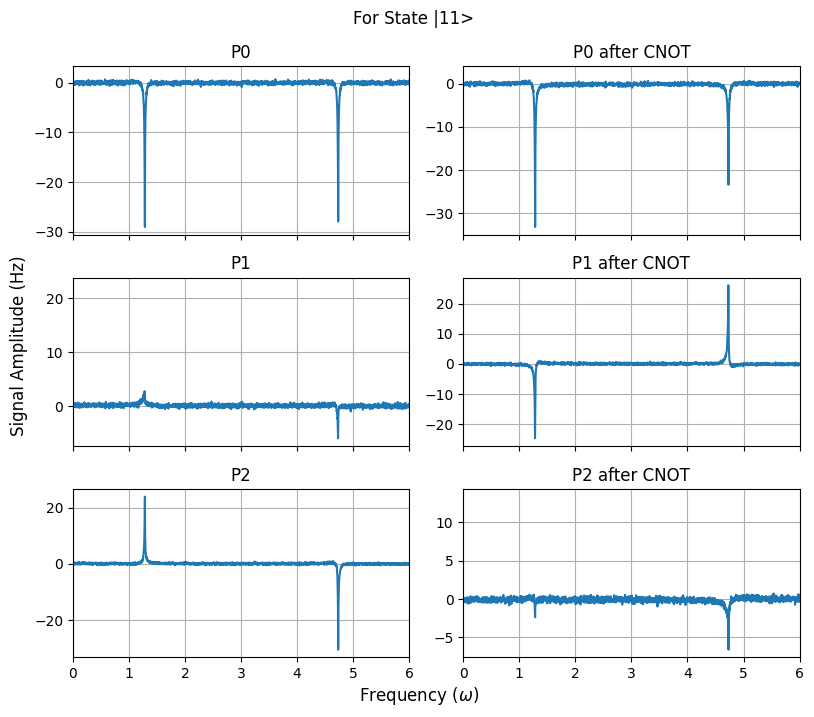

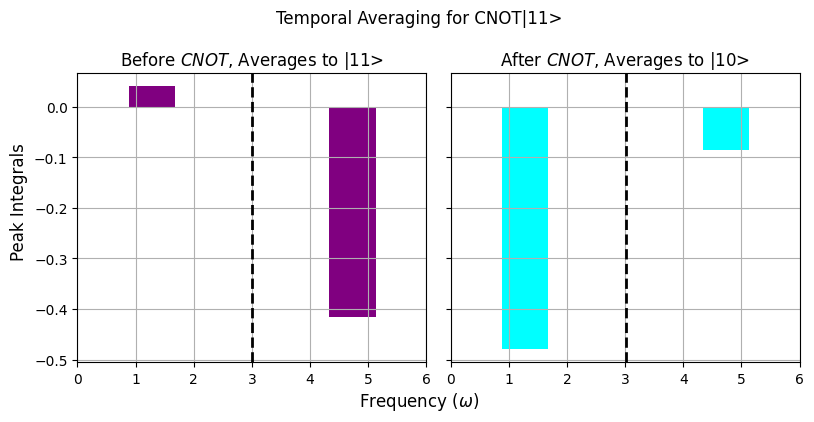

In [10]:
P0_11 = pd.read_csv("/Users/shashank/Documents/CNOT_TruthTable/11/P0_11.csv", header = None)
P0_CNOT_11 = pd.read_csv( "/Users/shashank/Documents/CNOT_TruthTable/11/P0_CNOT_11.csv", header = None)

P1_11 = pd.read_csv("/Users/shashank/Documents/CNOT_TruthTable/11/P1_11.csv", header = None)
P1_CNOT_11 = pd.read_csv( "/Users/shashank/Documents/CNOT_TruthTable/11/P1_CNOT_11.csv", header = None)

P2_11 = pd.read_csv("/Users/shashank/Documents/CNOT_TruthTable/11/P2_11.csv", header = None)
P2_CNOT_11 = pd.read_csv( "/Users/shashank/Documents/CNOT_TruthTable/11/P2_CNOT_11.csv", header = None)

freq_P0_11 = np.array(P0_11.iloc[:,0])
spec_P0_11 = np.array(P0_11.iloc[:,1])
freq_P0_CNOT_11 = np.array(P0_CNOT_11.iloc[:,0])
spec_P0_CNOT_11 = np.array(P0_CNOT_11.iloc[:,1])

freq_P1_11 = np.array(P1_11.iloc[:,0])
spec_P1_11 = np.array(P1_11.iloc[:,1])
freq_P1_CNOT_11 = np.array(P1_CNOT_11.iloc[:,0])
spec_P1_CNOT_11 = np.array(P1_CNOT_11.iloc[:,1])

freq_P2_11 = np.array(P2_11.iloc[:,0])
spec_P2_11 = np.array(P2_11.iloc[:,1])
freq_P2_CNOT_11 = np.array(P2_CNOT_11.iloc[:,0])
spec_P2_CNOT_11 = np.array(P2_CNOT_11.iloc[:,1])

loc_P0_11, int_P0_11 = integrator(freq_P0_11, spec_P0_11, 1, 6)
loc_P1_11, int_P1_11 = integrator(freq_P1_11, spec_P1_11, 1, 6)
loc_P2_11, int_P2_11 = integrator(freq_P2_11, spec_P2_11, 1, 6)
loc_P1_CNOT_11, int_P1_CNOT_11 = integrator(freq_P1_CNOT_11, spec_P1_CNOT_11, 1, 6)
loc_P0_CNOT_11, int_P0_CNOT_11 = integrator(freq_P0_CNOT_11, spec_P0_CNOT_11, 1, 6)
loc_P2_CNOT_11, int_P2_CNOT_11 = integrator(freq_P2_CNOT_11, spec_P2_CNOT_11, 1, 6)

plt.rcParams['axes.grid'] = True
fig, ax = plt.subplots(3, 2, sharex = 'all', figsize = (8,7))
fig.suptitle('For State |11>  ', fontsize=12)
ax[0, 1].set_xlim(0, 6)
ax[0, 0].plot(freq_P0_11, spec_P0_11)
ax[0, 0].title.set_text("P0")
ax[1, 0].plot(freq_P1_11, spec_P1_11)
ax[1, 0].title.set_text("P1")
ax[2, 0].plot(freq_P2_11, spec_P2_11)
ax[2, 0].title.set_text("P2")

ax[0, 1].plot(freq_P0_CNOT_11, spec_P0_CNOT_11)
ax[0, 1].title.set_text("P0 after CNOT")
ax[1, 1].plot(freq_P1_CNOT_11, spec_P1_CNOT_11)
ax[1, 1].title.set_text("P1 after CNOT")
ax[2, 1].plot(freq_P2_CNOT_11, spec_P2_CNOT_11)
ax[2, 1].title.set_text("P2 after CNOT")

fig.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig.text(0, 0.5, 'Signal Amplitude (Hz)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.tight_layout()
plt.show()

fig1, ax1 = plt.subplots(1, 2, sharex = 'all', sharey = 'all', figsize = (8,4))
fig1.suptitle('Temporal Averaging for CNOT|11>', fontsize=12)
ax1[0].set_xlim(0, 6)
ax1[0].bar(loc_P0_11, (int_P0_11 + int_P1_11 + int_P2_11)/3, color = 'purple') #negative sign for phase correction
ax1[0].axvline(x = 3.01, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[0].title.set_text("Before $CNOT$, Averages to |11>")
ax1[1].bar(loc_P0_CNOT_11, (int_P0_CNOT_11 + int_P1_CNOT_11 + int_P2_CNOT_11)/3, color = 'cyan') #negative sign for phase correction
ax1[1].axvline(x = 3.01, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[1].title.set_text("After $CNOT$, Averages to |10>")

fig1.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig1.text(0, 0.5, 'Peak Integrals', ha='center', va='center', rotation='vertical', fontsize = 12)
fig1.tight_layout()
plt.show()

### Truth Table for CNOT

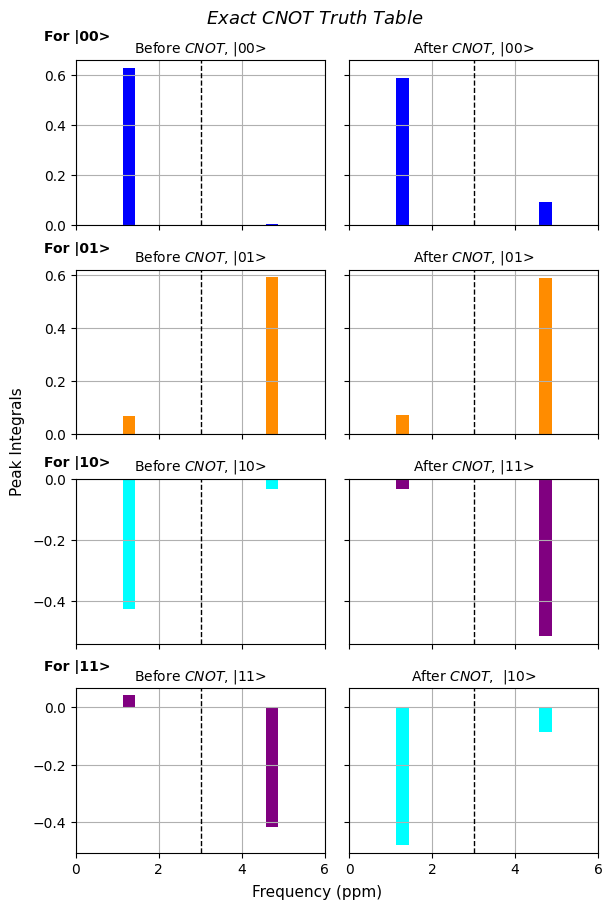

In [64]:
fig1, ax1 = plt.subplots(4, 2, sharex = 'all', sharey = 'row', figsize = (6,9))
fig1.suptitle('Exact $CNOT$ Truth Table  ', fontsize=13, style = 'italic') 
#00
ax1[0,0].set_xlim(0, 6)
ax1[0,0].bar(loc_P0_00, (int_P0_00 + int_P1_00 + int_P2_00)/3, color = 'blue', width = 0.3)
ax1[0,0].axvline(x = 3.01, linestyle = 'dashed', linewidth = 1, color = 'black')
ax1[0,0].set_title("Before $CNOT$, |00>", size = 10)
ax1[0,1].bar(loc_P0_CNOT_00, (int_P0_CNOT_00 + int_P1_CNOT_00 + int_P2_CNOT_00)/3, color = 'blue', width = 0.3)
ax1[0,1].axvline(x = 3.01, linestyle = 'dashed', linewidth = 1, color = 'black')
ax1[0,1].set_title("After $CNOT$, |00>", size = 10)

#01
ax1[1,0].set_xlim(0, 6)
ax1[1,0].bar(loc_P0_01, (int_P0_01 + int_P1_01 + int_P2_01)/3, color = 'darkorange', width = 0.3)
ax1[1,0].axvline(x = 3.01, linestyle = 'dashed', linewidth = 1, color = 'black')
ax1[1,0].set_title("Before $CNOT$, |01>", size = 10)
ax1[1,1].bar(loc_P0_CNOT_01, (int_P0_CNOT_01 + int_P1_CNOT_01 + int_P2_CNOT_01)/3, color = 'darkorange', width = 0.3)
ax1[1,1].axvline(x = 3.01, linestyle = 'dashed', linewidth = 1, color = 'black')
ax1[1,1].set_title("After $CNOT$, |01>", size = 10)

#10
ax1[2,0].set_xlim(0, 6)
ax1[2,0].bar(loc_P0_10, (int_P0_10 + int_P1_10 + int_P2_10)/3, color = 'cyan', width = 0.3)
ax1[2,0].axvline(x = 3.01, linestyle = 'dashed', linewidth = 1, color = 'black')
ax1[2,0].set_title("Before $CNOT$, |10>", size = 10)
ax1[2,1].bar(loc_P0_CNOT_10, (int_P0_CNOT_10 + int_P1_CNOT_10 + int_P2_CNOT_10)/3, color = 'purple', width = 0.3)
ax1[2,1].axvline(x = 3.01, linestyle = 'dashed', linewidth = 1, color = 'black')
ax1[2,1].set_title("After $CNOT$, |11>", size = 10)

#11
ax1[3,0].set_xlim(0, 6)
ax1[3,0].bar(loc_P0_11, (int_P0_11 + int_P1_11 + int_P2_11)/3, color = 'purple', width = 0.3)
ax1[3,0].axvline(x = 3.01, linestyle = 'dashed', linewidth = 1, color = 'black')
ax1[3,0].set_title("Before $CNOT$, |11>", size = 10)
ax1[3,1].bar(loc_P0_CNOT_11, (int_P0_CNOT_11 + int_P1_CNOT_11 + int_P2_CNOT_11)/3, color = 'cyan', width = 0.3)
ax1[3,1].axvline(x = 3.01, linestyle = 'dashed', linewidth = 1, color = 'black')
ax1[3,1].set_title("After $CNOT$,  |10>", size = 10)

fig1.text(0.1, 0.95, 'For |00>', fontweight = 'bold', ha='center', va='center', fontsize = 10)
fig1.text(0.1, 0.715, 'For |01>', fontweight = 'bold', ha='center', va='center', fontsize = 10)
fig1.text(0.1, 0.477, 'For |10>', fontweight = 'bold', ha='center', va='center', fontsize = 10)
fig1.text(0.1, 0.25, 'For |11>', fontweight = 'bold', ha='center', va='center', fontsize = 10)
fig1.text(0.5, 0, 'Frequency (ppm)', ha='center', va='center', fontsize = 11)
fig1.text(0, 0.5, 'Peak Integrals', ha='center', va='center', rotation='vertical', fontsize = 11)
fig1.tight_layout()
plt.show()

## Approx CNOT

### $|00\rangle$

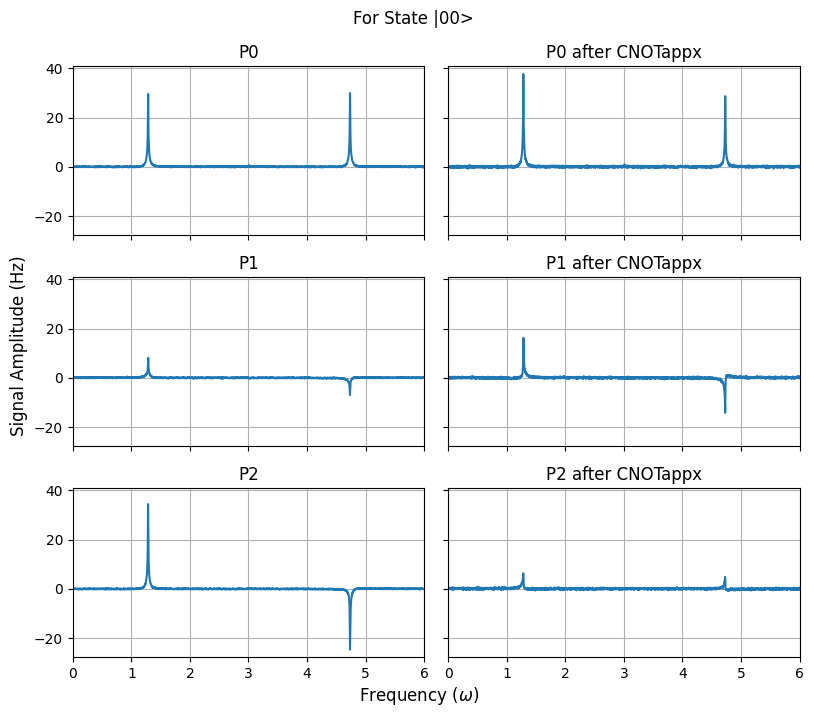

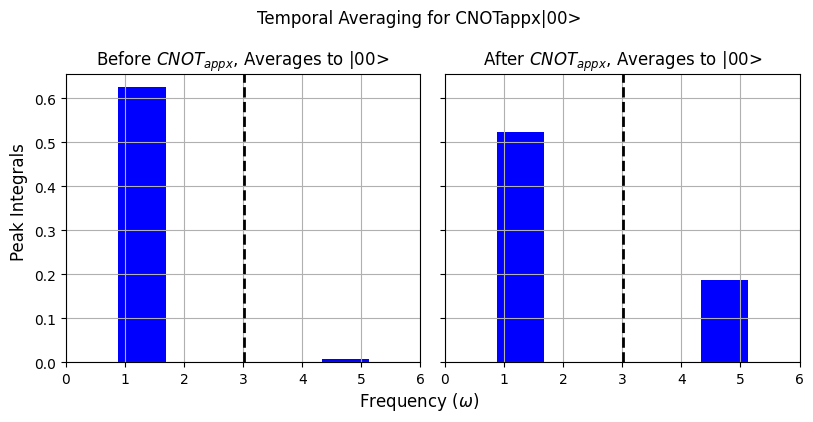

In [12]:
P0_00 = pd.read_csv("/Users/shashank/Documents/CNOT_appx_TruthTable/00/P0_00.csv", header = None)
P0_CNOTappx_00 = pd.read_csv( "/Users/shashank/Documents/CNOT_appx_TruthTable/00/P0_CNOTappx_00.csv", header = None)

P1_00 = pd.read_csv("/Users/shashank/Documents/CNOT_appx_TruthTable/00/P1_00.csv", header = None)
P1_CNOTappx_00 = pd.read_csv( "/Users/shashank/Documents/CNOT_appx_TruthTable/00/P1_CNOTappx_00.csv", header = None)

P2_00 = pd.read_csv("/Users/shashank/Documents/CNOT_appx_TruthTable/00/P2_00.csv", header = None)
P2_CNOTappx_00 = pd.read_csv( "/Users/shashank/Documents/CNOT_appx_TruthTable/00/P2_CNOTappx_00.csv", header = None)

freq_P0_00 = np.array(P0_00.iloc[:,0])
spec_P0_00 = np.array(P0_00.iloc[:,1])

freq_P0_CNOTappx_00 = np.array(P0_CNOTappx_00.iloc[:,0])
spec_P0_CNOTappx_00 = np.array(P0_CNOTappx_00.iloc[:,1])

freq_P1_00 = np.array(P1_00.iloc[:,0])
spec_P1_00 = np.array(P1_00.iloc[:,1])

freq_P1_CNOTappx_00 = np.array(P1_CNOTappx_00.iloc[:,0])
spec_P1_CNOTappx_00 = np.array(P1_CNOTappx_00.iloc[:,1])

freq_P2_00 = np.array(P2_00.iloc[:,0])
spec_P2_00 = np.array(P2_00.iloc[:,1])

freq_P2_CNOTappx_00 = np.array(P2_CNOTappx_00.iloc[:,0])
spec_P2_CNOTappx_00 = np.array(P2_CNOTappx_00.iloc[:,1])

loc_P0_00, int_P0_00 = integrator(freq_P0_00, spec_P0_00, 1, 6)
loc_P1_00, int_P1_00 = integrator(freq_P1_00, spec_P1_00, 1, 6, 0.5)
loc_P2_00, int_P2_00 = integrator(freq_P2_00, spec_P2_00, 1, 6)
loc_P0_CNOTappx_00, int_P0_CNOTappx_00 = integrator(freq_P0_CNOTappx_00, spec_P0_CNOTappx_00, 1, 6)
loc_P1_CNOTappx_00, int_P1_CNOTappx_00 = integrator(freq_P1_CNOTappx_00, spec_P1_CNOTappx_00, 1, 6)
loc_P2_CNOTappx_00, int_P2_CNOTappx_00 = integrator(freq_P2_CNOTappx_00, spec_P2_CNOTappx_00, 1, 6, 0.5)

plt.rcParams['axes.grid'] = True
fig, ax = plt.subplots(3, 2, sharey = 'all', sharex = 'all', figsize = (8,7))
fig.suptitle('For State |00>  ', fontsize=12)
ax[0, 1].set_xlim(0, 6)
ax[0, 0].plot(freq_P0_00, spec_P0_00)
ax[0, 0].title.set_text("P0")
ax[1, 0].plot(freq_P1_00, spec_P1_00)
ax[1, 0].title.set_text("P1")
ax[2, 0].plot(freq_P2_00, spec_P2_00)
ax[2, 0].title.set_text("P2")

ax[0, 1].plot(freq_P0_CNOTappx_00, spec_P0_CNOTappx_00)
ax[0, 1].title.set_text("P0 after CNOTappx")
ax[1, 1].plot(freq_P1_CNOTappx_00, spec_P1_CNOTappx_00)
ax[1, 1].title.set_text("P1 after CNOTappx")
ax[2, 1].plot(freq_P2_CNOTappx_00, spec_P2_CNOTappx_00)
ax[2, 1].title.set_text("P2 after CNOTappx")

fig.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig.text(0, 0.5, 'Signal Amplitude (Hz)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.tight_layout()
plt.show()

fig1, ax1 = plt.subplots(1, 2, sharex = 'all', sharey = 'all', figsize = (8,4))
fig1.suptitle('Temporal Averaging for CNOTappx|00>', fontsize=12)
ax1[0].set_xlim(0, 6)
ax1[0].bar(loc_P0_00, (int_P0_00 + int_P1_00 + int_P2_00)/3, color = 'blue')
ax1[0].axvline(x = 3.01, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[0].title.set_text("Before $CNOT_{appx}$, Averages to |00>")
ax1[1].bar(loc_P0_CNOTappx_00, (int_P0_CNOTappx_00 + int_P1_CNOTappx_00 + int_P2_CNOTappx_00)/3, color = 'blue')
ax1[1].axvline(x = 3.01, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[1].title.set_text("After $CNOT_{appx}$, Averages to |00>")

fig1.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig1.text(0, 0.5, 'Peak Integrals', ha='center', va='center', rotation='vertical', fontsize = 12)
fig1.tight_layout()
plt.show()

### $|01\rangle$

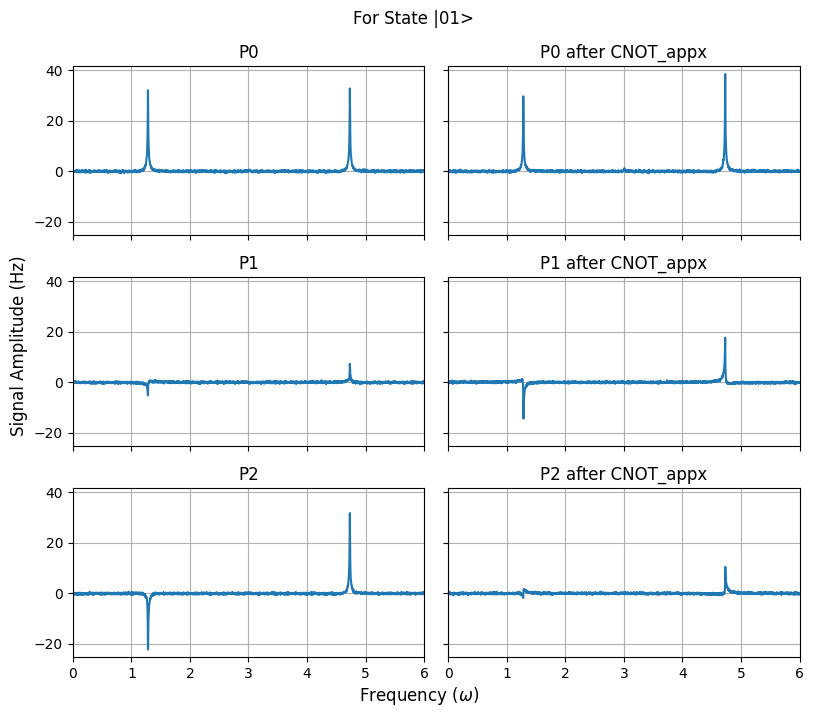

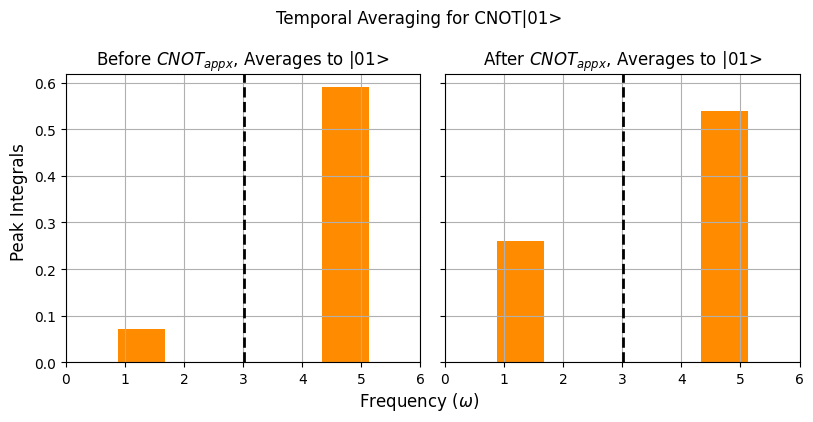

In [13]:
P0_01 = pd.read_csv("/Users/shashank/Documents/CNOT_appx_TruthTable/01/P0_01.csv", header = None)
P0_CNOTappx_01 = pd.read_csv( "/Users/shashank/Documents/CNOT_appx_TruthTable/01/P0_CNOTappx_01.csv", header = None)

P1_01 = pd.read_csv("/Users/shashank/Documents/CNOT_appx_TruthTable/01/P1_01.csv", header = None)
P1_CNOTappx_01 = pd.read_csv( "/Users/shashank/Documents/CNOT_appx_TruthTable/01/P1_CNOTappx_01.csv", header = None)

P2_01 = pd.read_csv("/Users/shashank/Documents/CNOT_appx_TruthTable/01/P2_01.csv", header = None)
P2_CNOTappx_01 = pd.read_csv( "/Users/shashank/Documents/CNOT_appx_TruthTable/01/P2_CNOTappx_01.csv", header = None)

freq_P0_01 = np.array(P0_01.iloc[:,0])
spec_P0_01 = np.array(P0_01.iloc[:,1])

freq_P0_CNOTappx_01 = np.array(P0_CNOTappx_01.iloc[:,0])
spec_P0_CNOTappx_01 = np.array(P0_CNOTappx_01.iloc[:,1])

freq_P1_01 = np.array(P1_01.iloc[:,0])
spec_P1_01 = np.array(P1_01.iloc[:,1])

freq_P1_CNOTappx_01 = np.array(P1_CNOTappx_01.iloc[:,0])
spec_P1_CNOTappx_01 = np.array(P1_CNOTappx_01.iloc[:,1])

freq_P2_01 = np.array(P2_01.iloc[:,0])
spec_P2_01 = np.array(P2_01.iloc[:,1])

freq_P2_CNOTappx_01 = np.array(P2_CNOTappx_01.iloc[:,0])
spec_P2_CNOTappx_01 = np.array(P2_CNOTappx_01.iloc[:,1])

loc_P0_01, int_P0_01 = integrator(freq_P0_01, spec_P0_01, 1, 6)
loc_P1_01, int_P1_01 = integrator(freq_P1_01, spec_P1_01, 1, 6, 0.6)
loc_P2_01, int_P2_01 = integrator(freq_P2_01, spec_P2_01, 1, 6)
loc_P1_CNOTappx_01, int_P1_CNOTappx_01 = integrator(freq_P1_CNOTappx_01, spec_P1_CNOTappx_01, 1, 6)
loc_P0_CNOTappx_01, int_P0_CNOTappx_01 = integrator(freq_P0_CNOTappx_01, spec_P0_CNOTappx_01, 1, 6)
loc_P2_CNOTappx_01, int_P2_CNOTappx_01 = integrator(freq_P2_CNOTappx_01, spec_P2_CNOTappx_01, 1, 6, 0.6)

plt.rcParams['axes.grid'] = True
fig, ax = plt.subplots(3, 2, sharey = 'all', sharex = 'all', figsize = (8,7))
fig.suptitle('For State |01>  ', fontsize=12)
ax[0, 1].set_xlim(0, 6)
ax[0, 0].plot(freq_P0_01, spec_P0_01)
ax[0, 0].title.set_text("P0")
ax[1, 0].plot(freq_P1_01, spec_P1_01)
ax[1, 0].title.set_text("P1")
ax[2, 0].plot(freq_P2_01, spec_P2_01)
ax[2, 0].title.set_text("P2")

ax[0, 1].plot(freq_P0_CNOTappx_01, spec_P0_CNOTappx_01)
ax[0, 1].title.set_text("P0 after CNOT_appx")
ax[1, 1].plot(freq_P1_CNOTappx_01, spec_P1_CNOTappx_01)
ax[1, 1].title.set_text("P1 after CNOT_appx")
ax[2, 1].plot(freq_P2_CNOTappx_01, spec_P2_CNOTappx_01)
ax[2, 1].title.set_text("P2 after CNOT_appx")

fig.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig.text(0, 0.5, 'Signal Amplitude (Hz)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.tight_layout()
plt.show()

fig1, ax1 = plt.subplots(1, 2, sharex = 'all', sharey = 'all', figsize = (8,4))
fig1.suptitle('Temporal Averaging for CNOT|01>', fontsize=12)
ax1[0].set_xlim(0, 6)
ax1[0].bar(loc_P0_01, (int_P0_01 + int_P1_01 + int_P2_01)/3, color = 'darkorange') 
ax1[0].axvline(x = 3.01, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[0].title.set_text("Before $CNOT_{appx}$, Averages to |01>")
ax1[1].bar(loc_P0_CNOT_01, (int_P0_CNOTappx_01 + int_P1_CNOTappx_01 + int_P2_CNOTappx_01)/3, color = 'darkorange') 
ax1[1].axvline(x = 3.01, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[1].title.set_text("After $CNOT_{appx}$, Averages to |01>")

fig1.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig1.text(0, 0.5, 'Peak Integrals', ha='center', va='center', rotation='vertical', fontsize = 12)
fig1.tight_layout()
plt.show()

### $|10\rangle$

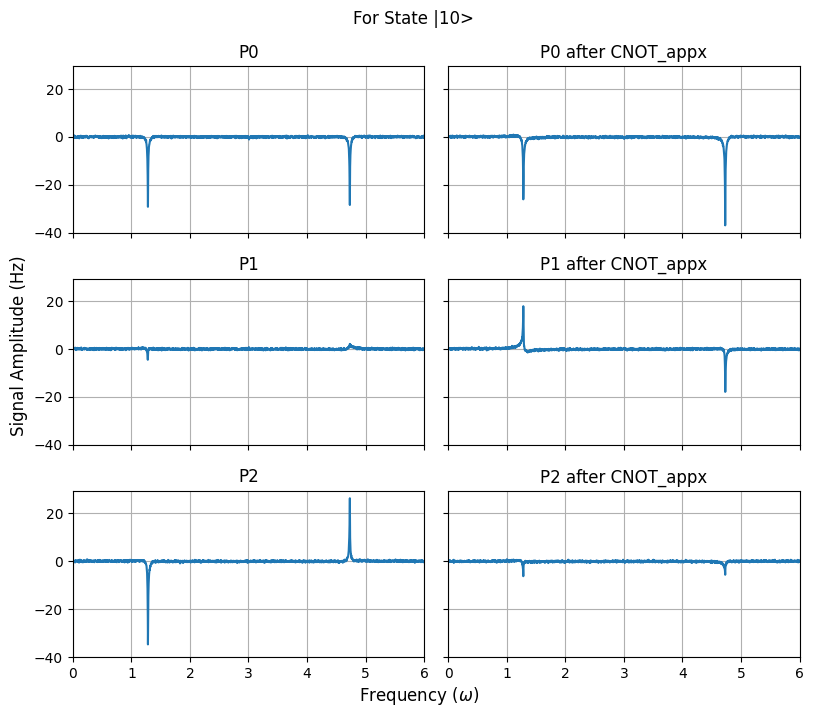

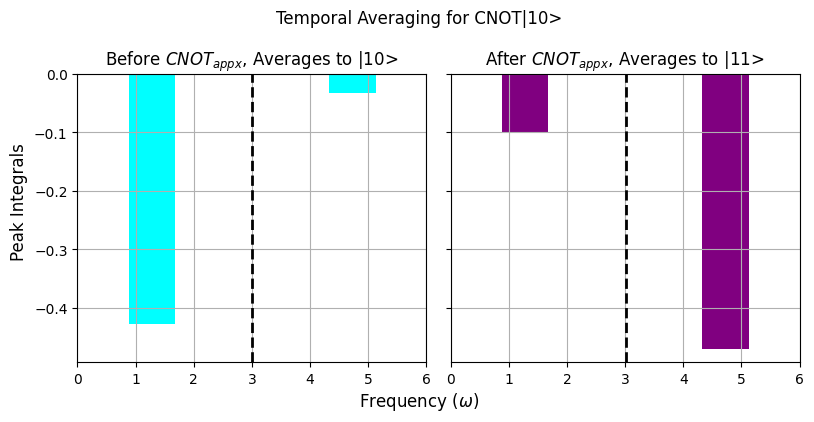

In [14]:
P0_10 = pd.read_csv("/Users/shashank/Documents/CNOT_appx_TruthTable/10/P0_10.csv", header = None)
P0_CNOTappx_10 = pd.read_csv( "/Users/shashank/Documents/CNOT_appx_TruthTable/10/P0_CNOTappx_10.csv", header = None)

P1_10 = pd.read_csv("/Users/shashank/Documents/CNOT_appx_TruthTable/10/P1_10.csv", header = None)
P1_CNOTappx_10 = pd.read_csv( "/Users/shashank/Documents/CNOT_appx_TruthTable/10/P1_CNOTappx_10.csv", header = None)

P2_10 = pd.read_csv("/Users/shashank/Documents/CNOT_appx_TruthTable/10/P2_10.csv", header = None)
P2_CNOTappx_10 = pd.read_csv( "/Users/shashank/Documents/CNOT_appx_TruthTable/10/P2_CNOTappx_10.csv", header = None)

freq_P0_10 = np.array(P0_10.iloc[:,0])
spec_P0_10 = np.array(P0_10.iloc[:,1])
freq_P0_CNOTappx_10 = np.array(P0_CNOTappx_10.iloc[:,0])
spec_P0_CNOTappx_10 = np.array(P0_CNOTappx_10.iloc[:,1])

freq_P1_10 = np.array(P1_10.iloc[:,0])
spec_P1_10 = np.array(P1_10.iloc[:,1])
freq_P1_CNOTappx_10 = np.array(P1_CNOTappx_10.iloc[:,0])
spec_P1_CNOTappx_10 = np.array(P1_CNOTappx_10.iloc[:,1])

freq_P2_10 = np.array(P2_10.iloc[:,0])
spec_P2_10 = np.array(P2_10.iloc[:,1])
freq_P2_CNOTappx_10 = np.array(P2_CNOTappx_10.iloc[:,0])
spec_P2_CNOTappx_10 = np.array(P2_CNOTappx_10.iloc[:,1])

loc_P0_10, int_P0_10 = integrator(freq_P0_10, spec_P0_10, 1, 6)
loc_P1_10, int_P1_10 = integrator(freq_P1_10, spec_P1_10, 1, 6, 0.9)
loc_P2_10, int_P2_10 = integrator(freq_P2_10, spec_P2_10, 1, 6)
loc_P1_CNOTappx_10, int_P1_CNOTappx_10 = integrator(freq_P1_CNOTappx_10, spec_P1_CNOTappx_10, 1, 6)
loc_P0_CNOTappx_10, int_P0_CNOTappx_10 = integrator(freq_P0_CNOTappx_10, spec_P0_CNOTappx_10, 1, 6)
loc_P2_CNOTappx_10, int_P2_CNOTappx_10 = integrator(freq_P2_CNOTappx_10, spec_P2_CNOTappx_10, 1, 6, 0.9)

plt.rcParams['axes.grid'] = True
fig, ax = plt.subplots(3, 2, sharey = 'all', sharex = 'all', figsize = (8,7))
fig.suptitle('For State |10>  ', fontsize=12)
ax[0, 1].set_xlim(0, 6)
ax[0, 0].plot(freq_P0_10, spec_P0_10)
ax[0, 0].title.set_text("P0")
ax[1, 0].plot(freq_P1_10, spec_P1_10)
ax[1, 0].title.set_text("P1")
ax[2, 0].plot(freq_P2_10, spec_P2_10)
ax[2, 0].title.set_text("P2")

ax[0, 1].plot(freq_P0_CNOTappx_10, spec_P0_CNOTappx_10)
ax[0, 1].title.set_text("P0 after CNOT_appx")
ax[1, 1].plot(freq_P1_CNOTappx_10, spec_P1_CNOTappx_10)
ax[1, 1].title.set_text("P1 after CNOT_appx")
ax[2, 1].plot(freq_P2_CNOTappx_10, spec_P2_CNOTappx_10)
ax[2, 1].title.set_text("P2 after CNOT_appx")

fig.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig.text(0, 0.5, 'Signal Amplitude (Hz)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.tight_layout()
plt.show()

fig1, ax1 = plt.subplots(1, 2, sharex = 'all', sharey = 'all', figsize = (8,4))
fig1.suptitle('Temporal Averaging for CNOT|10>', fontsize=12)
ax1[0].set_xlim(0, 6)
ax1[0].bar(loc_P0_10, (int_P0_10 + int_P1_10 + int_P2_10)/3, color = 'cyan') 
ax1[0].axvline(x = 3.01, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[0].title.set_text("Before $CNOT_{appx}$, Averages to |10>")
ax1[1].bar(loc_P0_CNOTappx_10, (int_P0_CNOTappx_10 + int_P1_CNOTappx_10 + int_P2_CNOTappx_10)/3, color = 'purple')
ax1[1].axvline(x = 3.01, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[1].title.set_text("After $CNOT_{appx}$, Averages to |11>")

fig1.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig1.text(0, 0.5, 'Peak Integrals', ha='center', va='center', rotation='vertical', fontsize = 12)
fig1.tight_layout()
plt.show()

### $|11\rangle$

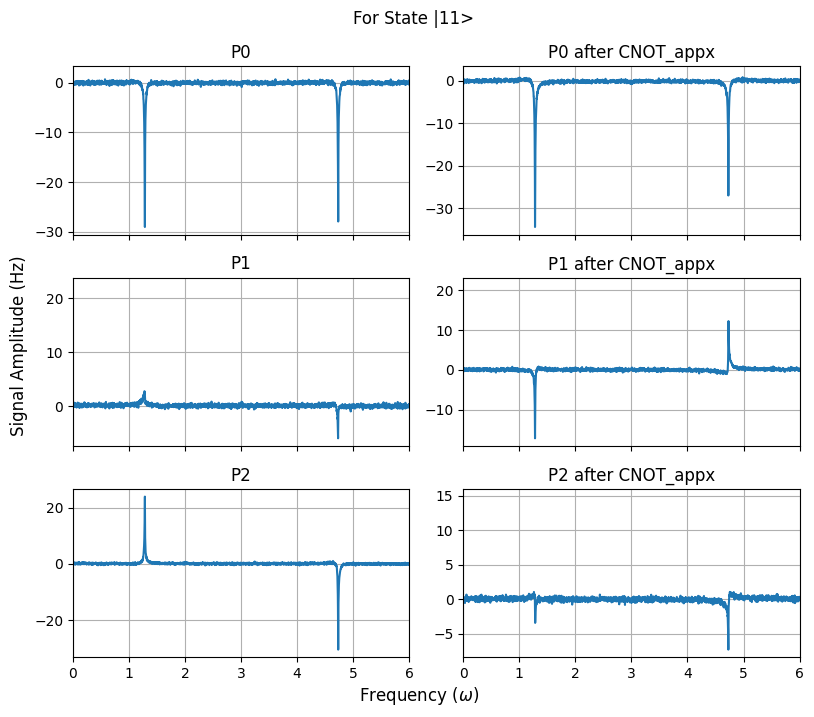

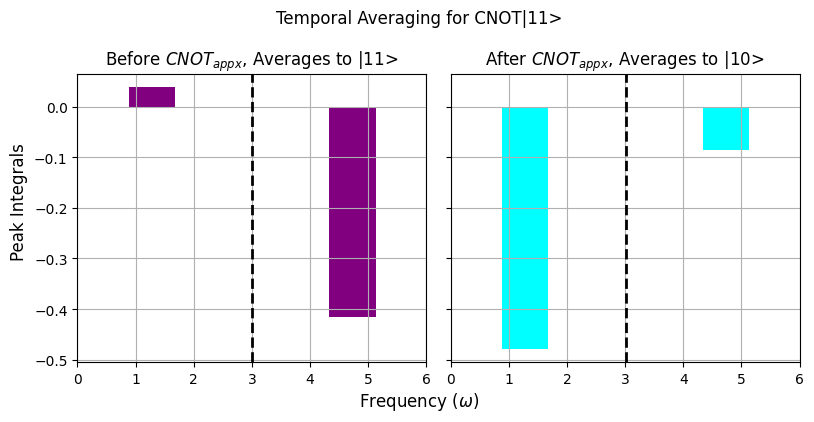

In [15]:
P0_11 = pd.read_csv("/Users/shashank/Documents/CNOT_appx_TruthTable/11/P0_11.csv", header = None)
P0_CNOTappx_11 = pd.read_csv( "/Users/shashank/Documents/CNOT_appx_TruthTable/11/P0_CNOTappx_11.csv", header = None)

P1_11 = pd.read_csv("/Users/shashank/Documents/CNOT_appx_TruthTable/11/P1_11.csv", header = None)
P1_CNOTappx_11 = pd.read_csv( "/Users/shashank/Documents/CNOT_appx_TruthTable/11/P1_CNOTappx_11.csv", header = None)

P2_11 = pd.read_csv("/Users/shashank/Documents/CNOT_appx_TruthTable/11/P2_11.csv", header = None)
P2_CNOTappx_11 = pd.read_csv( "/Users/shashank/Documents/CNOT_appx_TruthTable/11/P2_CNOTappx_11.csv", header = None)

freq_P0_11 = np.array(P0_11.iloc[:,0])
spec_P0_11 = np.array(P0_11.iloc[:,1])
freq_P0_CNOTappx_11 = np.array(P0_CNOTappx_11.iloc[:,0])
spec_P0_CNOTappx_11 = np.array(P0_CNOTappx_11.iloc[:,1])

freq_P1_11 = np.array(P1_11.iloc[:,0])
spec_P1_11 = np.array(P1_11.iloc[:,1])
freq_P1_CNOTappx_11 = np.array(P1_CNOTappx_11.iloc[:,0])
spec_P1_CNOTappx_11 = np.array(P1_CNOTappx_11.iloc[:,1])

freq_P2_11 = np.array(P2_11.iloc[:,0])
spec_P2_11 = np.array(P2_11.iloc[:,1])
freq_P2_CNOTappx_11 = np.array(P2_CNOTappx_11.iloc[:,0])
spec_P2_CNOTappx_11 = np.array(P2_CNOTappx_11.iloc[:,1])

loc_P0_11, int_P0_11 = integrator(freq_P0_11, spec_P0_11, 1, 6)
loc_P1_11, int_P1_11 = integrator(freq_P1_11, spec_P1_11, 1, 6)
loc_P2_11, int_P2_11 = integrator(freq_P2_11, spec_P2_11, 1, 6)
loc_P1_CNOTappx_11, int_P1_CNOTappx_11 = integrator(freq_P1_CNOTappx_11, spec_P1_CNOTappx_11, 1, 6)
loc_P0_CNOTappx_11, int_P0_CNOTappx_11 = integrator(freq_P0_CNOTappx_11, spec_P0_CNOTappx_11, 1, 6)
loc_P2_CNOTappx_11, int_P2_CNOTappx_11 = integrator(freq_P2_CNOTappx_11, spec_P2_CNOTappx_11, 1, 6)

plt.rcParams['axes.grid'] = True
fig, ax = plt.subplots(3, 2, sharex = 'all', figsize = (8,7))
fig.suptitle('For State |11>  ', fontsize=12)
ax[0, 1].set_xlim(0, 6)
ax[0, 0].plot(freq_P0_11, spec_P0_11)
ax[0, 0].title.set_text("P0")
ax[1, 0].plot(freq_P1_11, spec_P1_11)
ax[1, 0].title.set_text("P1")
ax[2, 0].plot(freq_P2_11, spec_P2_11)
ax[2, 0].title.set_text("P2")

ax[0, 1].plot(freq_P0_CNOTappx_11, spec_P0_CNOTappx_11)
ax[0, 1].title.set_text("P0 after CNOT_appx")
ax[1, 1].plot(freq_P1_CNOTappx_11, spec_P1_CNOTappx_11)
ax[1, 1].title.set_text("P1 after CNOT_appx")
ax[2, 1].plot(freq_P2_CNOTappx_11, spec_P2_CNOTappx_11)
ax[2, 1].title.set_text("P2 after CNOT_appx")

fig.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig.text(0, 0.5, 'Signal Amplitude (Hz)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.tight_layout()
plt.show()

fig1, ax1 = plt.subplots(1, 2, sharex = 'all', sharey = 'all', figsize = (8,4))
fig1.suptitle('Temporal Averaging for CNOT|11>', fontsize=12)
ax1[0].set_xlim(0, 6)
ax1[0].bar(loc_P0_11, (int_P0_11 + int_P1_11 + int_P2_11)/3, color = 'purple')
ax1[0].axvline(x = 3.01, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[0].title.set_text("Before $CNOT_{appx}$, Averages to |11>")
ax1[1].bar(loc_P0_CNOT_11, (int_P0_CNOT_11 + int_P1_CNOT_11 + int_P2_CNOT_11)/3, color = 'cyan') 
ax1[1].axvline(x = 3.01, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[1].title.set_text("After $CNOT_{appx}$, Averages to |10>")

fig1.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig1.text(0, 0.5, 'Peak Integrals', ha='center', va='center', rotation='vertical', fontsize = 12)
fig1.tight_layout()
plt.show()

### Truth Table for Appx CNOT

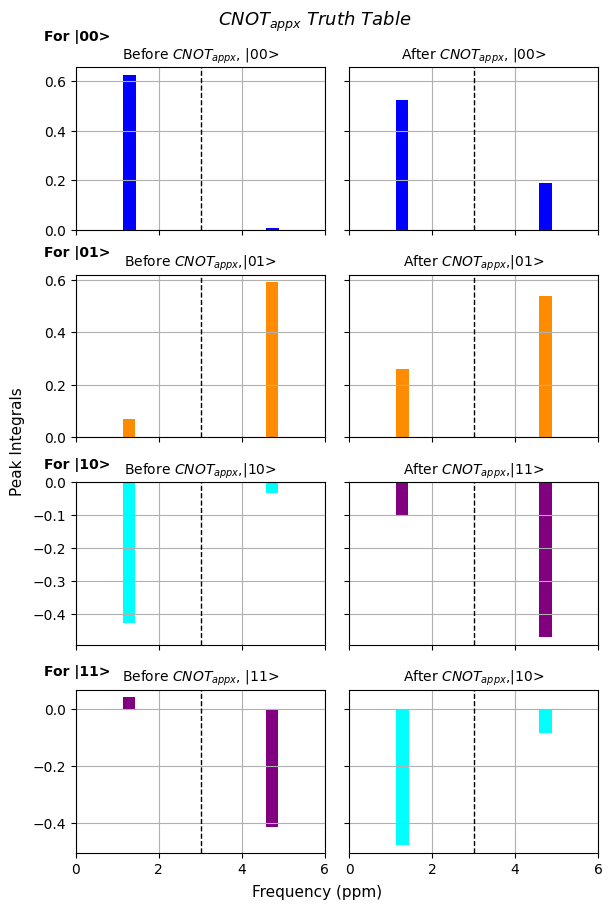

In [65]:
fig1, ax1 = plt.subplots(4, 2, sharex = 'all', sharey = 'row', figsize = (6,9))
fig1.suptitle('$CNOT_{appx}$ Truth Table  ', fontsize=13, style = 'italic')
#00
ax1[0,0].set_xlim(0, 6)
ax1[0,0].bar(loc_P0_00, (int_P0_00 + int_P1_00 + int_P2_00)/3, color = 'blue', width = 0.3)
ax1[0,0].axvline(x = 3.01, linestyle = 'dashed', linewidth = 1, color = 'black')
ax1[0,0].set_title("Before $CNOT_{appx}$, |00>", size = 10)
ax1[0,1].bar(loc_P0_CNOTappx_00, (int_P0_CNOTappx_00 + int_P1_CNOTappx_00 + int_P2_CNOTappx_00)/3, color = 'blue', width = 0.3)
ax1[0,1].axvline(x = 3.01, linestyle = 'dashed', linewidth = 1, color = 'black')
ax1[0,1].set_title("After $CNOT_{appx}$, |00>", size = 10)

#01
ax1[1,0].set_xlim(0, 6)
ax1[1,0].bar(loc_P0_01, (int_P0_01 + int_P1_01 + int_P2_01)/3, color = 'darkorange', width = 0.3) 
ax1[1,0].axvline(x = 3.01, linestyle = 'dashed', linewidth = 1, color = 'black')
ax1[1,0].set_title("Before $CNOT_{appx}$,|01>", size = 10)
ax1[1,1].bar(loc_P0_CNOT_01, (int_P0_CNOTappx_01 + int_P1_CNOTappx_01 + int_P2_CNOTappx_01)/3, color = 'darkorange', width = 0.3)
ax1[1,1].axvline(x = 3.01, linestyle = 'dashed', linewidth = 1, color = 'black')
ax1[1,1].set_title("After $CNOT_{appx}$,|01>", size = 10)

#10
ax1[2,0].set_xlim(0, 6)
ax1[2,0].bar(loc_P0_10, (int_P0_10 + int_P1_10 + int_P2_10)/3, color = 'cyan', width = 0.3) 
ax1[2,0].axvline(x = 3.01, linestyle = 'dashed', linewidth = 1, color = 'black')
ax1[2,0].set_title("Before $CNOT_{appx}$,|10>", size = 10)
ax1[2,1].bar(loc_P0_CNOTappx_10, (int_P0_CNOTappx_10 + int_P1_CNOTappx_10 + int_P2_CNOTappx_10)/3, color = 'purple', width = 0.3)
ax1[2,1].axvline(x = 3.01, linestyle = 'dashed', linewidth = 1, color = 'black')
ax1[2,1].set_title("After $CNOT_{appx}$,|11>", size = 10)

#11
ax1[3,0].set_xlim(0, 6)
ax1[3,0].bar(loc_P0_11, (int_P0_11 + int_P1_11 + int_P2_11)/3, color = 'purple', width = 0.3)
ax1[3,0].axvline(x = 3.01, linestyle = 'dashed', linewidth = 1, color = 'black')
ax1[3,0].set_title("Before $CNOT_{appx}$, |11>", size = 10)
ax1[3,1].bar(loc_P0_CNOT_11, (int_P0_CNOT_11 + int_P1_CNOT_11 + int_P2_CNOT_11)/3, color = 'cyan', width = 0.3)
ax1[3,1].axvline(x = 3.01, linestyle = 'dashed', linewidth = 1, color = 'black')
ax1[3,1].set_title("After $CNOT_{appx}$,|10>", size = 10)

fig1.text(0.1, 0.95, 'For |00>', fontweight = 'bold', ha='center', va='center', fontsize = 10)
fig1.text(0.1, 0.71, 'For |01>', fontweight = 'bold', ha='center', va='center', fontsize = 10)
fig1.text(0.1, 0.475, 'For |10>', fontweight = 'bold', ha='center', va='center', fontsize = 10)
fig1.text(0.1, 0.245, 'For |11>', fontweight = 'bold', ha='center', va='center', fontsize = 10)
fig1.text(0.5, 0, 'Frequency (ppm)', ha='center', va='center', fontsize = 11)
fig1.text(0, 0.5, 'Peak Integrals', ha='center', va='center', rotation='vertical', fontsize = 11)
fig1.tight_layout()
plt.show()

# LAB 4

## Deutsch-Jozsa Algorithm

### Constant

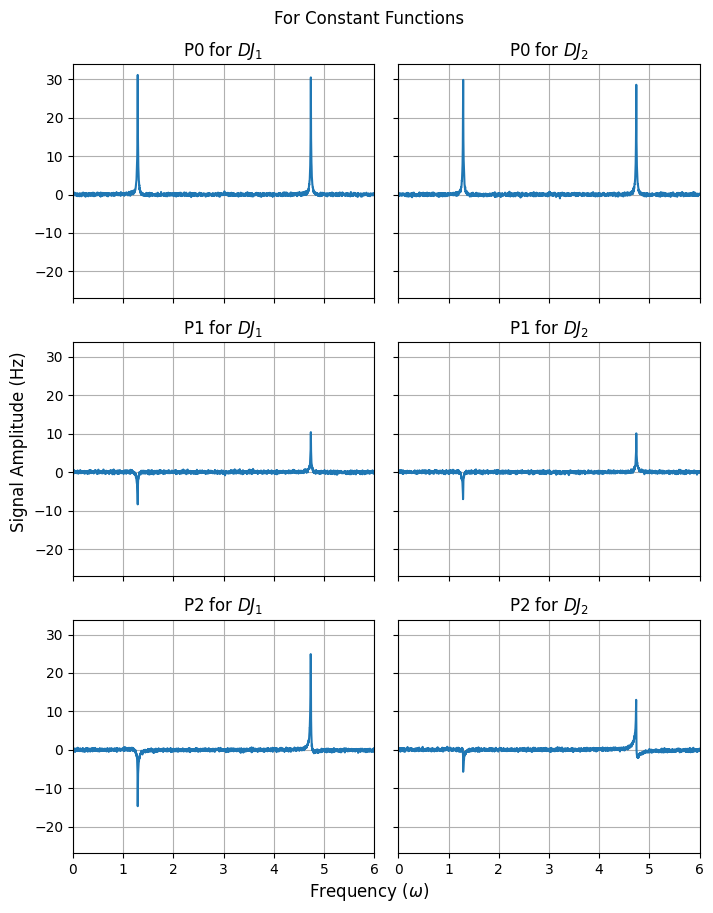

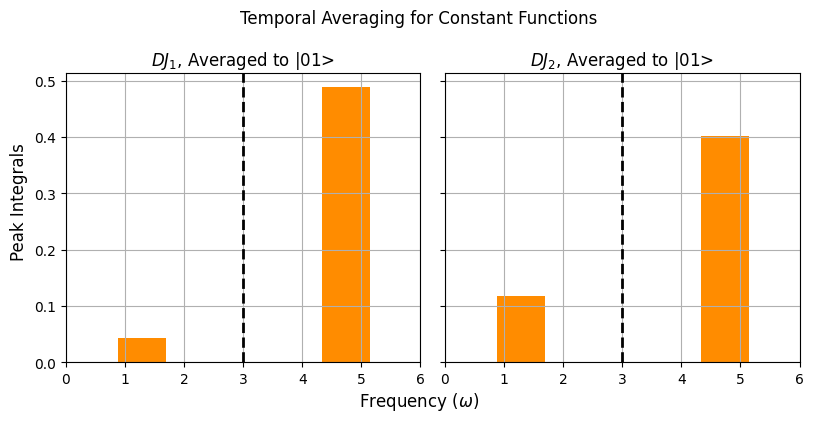

In [17]:
P0_DJ1 = pd.read_csv("/Users/shashank/Documents/Deutsch-Jozsa/DJ_1/P0_DJ1_1H.csv", header = None)
P1_DJ1 = pd.read_csv("/Users/shashank/Documents/Deutsch-Jozsa/DJ_1/P1_DJ1_1H.csv", header = None)
P2_DJ1 = pd.read_csv("/Users/shashank/Documents/Deutsch-Jozsa/DJ_1/P2_DJ1_1H.csv", header = None)

freq_P0_DJ1 = np.array(P0_DJ1.iloc[:,0])
spec_P0_DJ1 = np.array(P0_DJ1.iloc[:,1])

freq_P1_DJ1 = np.array(P1_DJ1.iloc[:,0])
spec_P1_DJ1 = np.array(P1_DJ1.iloc[:,1])

freq_P2_DJ1 = np.array(P2_DJ1.iloc[:,0])
spec_P2_DJ1 = np.array(P2_DJ1.iloc[:,1])

P0_DJ2 = pd.read_csv("/Users/shashank/Documents/Deutsch-Jozsa/DJ_2/P0_DJ2_1H.csv", header = None)
P1_DJ2 = pd.read_csv("/Users/shashank/Documents/Deutsch-Jozsa/DJ_2/P1_DJ2_1H.csv", header = None)
P2_DJ2 = pd.read_csv("/Users/shashank/Documents/Deutsch-Jozsa/DJ_2/P2_DJ2_1H.csv", header = None)

freq_P0_DJ2 = np.array(P0_DJ2.iloc[:,0])
spec_P0_DJ2 = np.array(P0_DJ2.iloc[:,1])

freq_P1_DJ2 = np.array(P1_DJ2.iloc[:,0])
spec_P1_DJ2 = np.array(P1_DJ2.iloc[:,1])

freq_P2_DJ2 = np.array(P2_DJ2.iloc[:,0])
spec_P2_DJ2 = np.array(P2_DJ2.iloc[:,1])

loc_P0_DJ1, int_P0_DJ1 = integrator(freq_P0_DJ1, spec_P0_DJ1, 1,5)
loc_P1_DJ1, int_P1_DJ1 = integrator(freq_P1_DJ1, spec_P1_DJ1, 1,5)
loc_P2_DJ1, int_P2_DJ1 = integrator(freq_P2_DJ1, spec_P2_DJ1, 1,5)
loc_P1_DJ2, int_P1_DJ2 = integrator(freq_P1_DJ2, spec_P1_DJ2, 1,5)
loc_P0_DJ2, int_P0_DJ2 = integrator(freq_P0_DJ2, spec_P0_DJ2, 1,5)
loc_P2_DJ2, int_P2_DJ2 = integrator(freq_P2_DJ2, spec_P2_DJ2, 1,5)

plt.rcParams['axes.grid'] = True
fig, ax = plt.subplots(3, 2, sharey = 'all', sharex = 'all', figsize = (7,9))
fig.suptitle('For Constant Functions', fontsize=12)
ax[0,0].set_xlim(0, 6)
ax[0,0].plot(freq_P0_DJ1, spec_P0_DJ1)
ax[0,0].title.set_text("P0 for $DJ_1$")
ax[1,0].plot(freq_P1_DJ1, spec_P1_DJ1)
ax[1,0].title.set_text("P1 for $DJ_1$")
ax[2,0].plot(freq_P2_DJ1, spec_P2_DJ1)
ax[2,0].title.set_text("P2 for $DJ_1$")

ax[0,1].plot(freq_P0_DJ2, spec_P0_DJ2)
ax[0,1].title.set_text("P0 for $DJ_2$")
ax[1,1].plot(freq_P1_DJ2, spec_P1_DJ2)
ax[1,1].title.set_text("P1 for $DJ_2$")
ax[2,1].plot(freq_P2_DJ2, spec_P2_DJ2)
ax[2,1].title.set_text("P2 for $DJ_2$")

fig.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig.text(0, 0.5, 'Signal Amplitude (Hz)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.tight_layout()
plt.show()

fig1, ax1 = plt.subplots(1, 2, sharex = 'all', sharey = 'all', figsize = (8,4))
fig1.suptitle('Temporal Averaging for Constant Functions', fontsize=12)
ax1[0].set_xlim(0, 6)
ax1[0].bar(loc_P0_DJ1, (int_P0_DJ1 + int_P1_DJ1 + int_P2_DJ1)/3, color = 'darkorange')
ax1[0].axvline(x = 3, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[0].title.set_text("$DJ_1$, Averaged to |01>")
ax1[1].bar(loc_P0_DJ2, (int_P0_DJ2 + int_P1_DJ2 + int_P2_DJ2)/3, color = 'darkorange')
ax1[1].axvline(x = 3, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[1].title.set_text("$DJ_2$, Averaged to |01>")

fig1.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig1.text(0, 0.5, 'Peak Integrals', ha='center', va='center', rotation='vertical', fontsize = 12)
fig1.tight_layout()
plt.show()

### Balanced

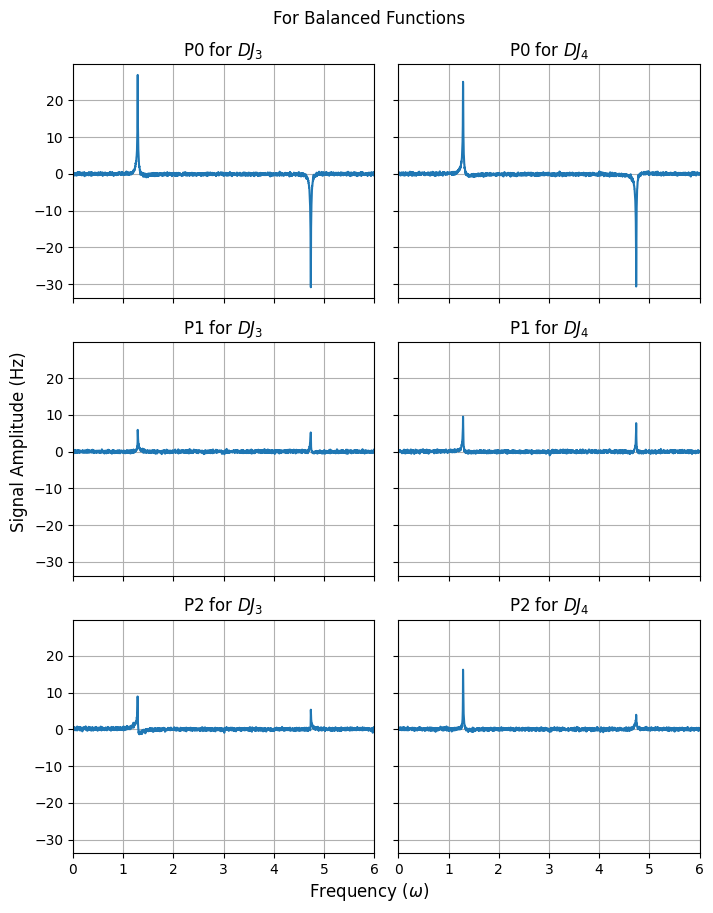

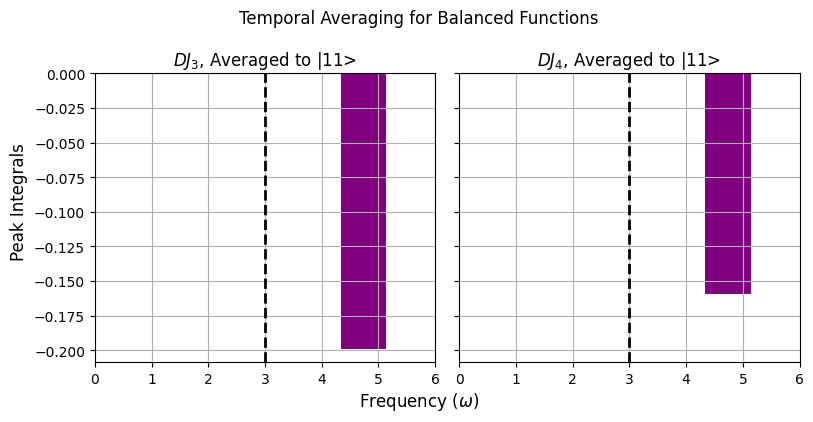

In [18]:
P0_DJ3 = pd.read_csv("/Users/shashank/Documents/Deutsch-Jozsa/DJ_3/P0_DJ3_1H.csv", header = None)
P1_DJ3 = pd.read_csv("/Users/shashank/Documents/Deutsch-Jozsa/DJ_3/P1_DJ3_1H.csv", header = None)
P2_DJ3 = pd.read_csv("/Users/shashank/Documents/Deutsch-Jozsa/DJ_3/P2_DJ3_1H.csv", header = None)

freq_P0_DJ3 = np.array(P0_DJ3.iloc[:,0])
spec_P0_DJ3 = np.array(P0_DJ3.iloc[:,1])

freq_P1_DJ3 = np.array(P1_DJ3.iloc[:,0])
spec_P1_DJ3 = np.array(P1_DJ3.iloc[:,1])

freq_P2_DJ3 = np.array(P2_DJ3.iloc[:,0])
spec_P2_DJ3 = np.array(P2_DJ3.iloc[:,1])

P0_DJ4 = pd.read_csv("/Users/shashank/Documents/Deutsch-Jozsa/DJ_4/P0_DJ4_1H.csv", header = None)
P1_DJ4 = pd.read_csv("/Users/shashank/Documents/Deutsch-Jozsa/DJ_4/P1_DJ4_1H.csv", header = None)
P2_DJ4 = pd.read_csv("/Users/shashank/Documents/Deutsch-Jozsa/DJ_4/P2_DJ4_1H.csv", header = None)

freq_P0_DJ4 = np.array(P0_DJ4.iloc[:,0])
spec_P0_DJ4 = np.array(P0_DJ4.iloc[:,1])

freq_P1_DJ4 = np.array(P1_DJ4.iloc[:,0])
spec_P1_DJ4 = np.array(P1_DJ4.iloc[:,1])

freq_P2_DJ4 = np.array(P2_DJ4.iloc[:,0])
spec_P2_DJ4 = np.array(P2_DJ4.iloc[:,1])

loc_P0_DJ3, int_P0_DJ3 = integrator(freq_P0_DJ3, spec_P0_DJ3, 3, 5)
loc_P1_DJ3, int_P1_DJ3 = integrator(freq_P1_DJ3, spec_P1_DJ3, 3, 5)
loc_P2_DJ3, int_P2_DJ3 = integrator(freq_P2_DJ3, spec_P2_DJ3, 3, 5)

loc_P0_DJ4, int_P0_DJ4 = integrator(freq_P0_DJ4, spec_P0_DJ4, 3, 5)
loc_P1_DJ4, int_P1_DJ4 = integrator(freq_P1_DJ4, spec_P1_DJ4, 3, 5)
loc_P2_DJ4, int_P2_DJ4 = integrator(freq_P2_DJ4, spec_P2_DJ4, 3, 5)

plt.rcParams['axes.grid'] = True
fig, ax = plt.subplots(3, 2, sharey = 'all', sharex = 'all', figsize = (7,9))
fig.suptitle('For Balanced Functions', fontsize=12)
ax[0,0].set_xlim(0, 6)
ax[0,0].plot(freq_P0_DJ3, spec_P0_DJ3)
ax[0,0].title.set_text("P0 for $DJ_3$")
ax[1,0].plot(freq_P1_DJ3, spec_P1_DJ3)
ax[1,0].title.set_text("P1 for $DJ_3$")
ax[2,0].plot(freq_P2_DJ3, spec_P2_DJ3)
ax[2,0].title.set_text("P2 for $DJ_3$")

ax[0,1].plot(freq_P0_DJ4, spec_P0_DJ4)
ax[0,1].title.set_text("P0 for $DJ_4$")
ax[1,1].plot(freq_P1_DJ4, spec_P1_DJ4)
ax[1,1].title.set_text("P1 for $DJ_4$")
ax[2,1].plot(freq_P2_DJ4, spec_P2_DJ4)
ax[2,1].title.set_text("P2 for $DJ_4$")

fig.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig.text(0, 0.5, 'Signal Amplitude (Hz)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.tight_layout()
plt.show()

fig1, ax1 = plt.subplots(1, 2, sharex = 'all', sharey = 'all', figsize = (8,4))
fig1.suptitle('Temporal Averaging for Balanced Functions', fontsize=12)
ax1[0].set_xlim(0, 6)
ax1[0].bar(loc_P0_DJ3, (int_P0_DJ3 + int_P1_DJ3 + int_P2_DJ3)/3, color = 'purple')
ax1[0].axvline(x = 3, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[0].title.set_text("$DJ_3$, Averaged to |11>")
ax1[1].bar(loc_P0_DJ4, (int_P0_DJ4 + int_P1_DJ4 + int_P2_DJ4)/3, color = 'purple')
ax1[1].axvline(x = 3, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[1].title.set_text("$DJ_4$, Averaged to |11>")

fig1.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig1.text(0, 0.5, 'Peak Integrals', ha='center', va='center', rotation='vertical', fontsize = 12)
fig1.tight_layout()
plt.show()


### Truth Table

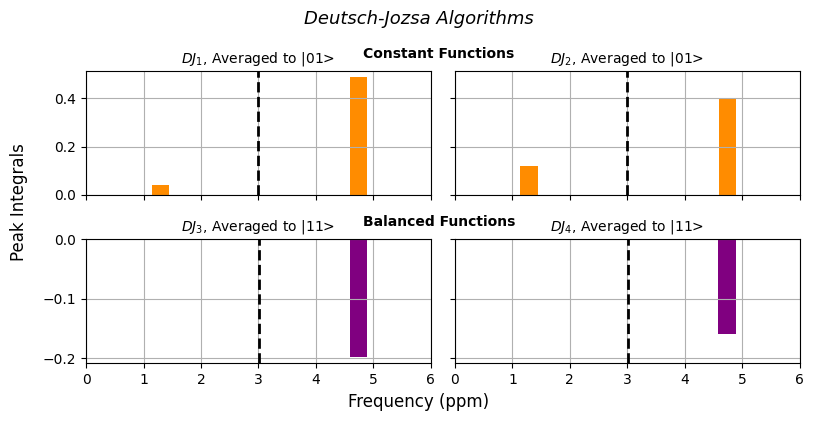

In [66]:
fig1, ax1 = plt.subplots(2, 2, sharex = 'all', sharey = 'row', figsize = (8,4))
fig1.suptitle('Deutsch-Jozsa Algorithms', fontsize=13, style = 'italic')
ax1[0,0].set_xlim(0, 6)
ax1[0,0].bar(loc_P0_DJ1, (int_P0_DJ1 + int_P1_DJ1 + int_P2_DJ1)/3, color = 'darkorange', width = 0.3)
ax1[0,0].axvline(x = 3, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[0,0].set_title("$DJ_1$, Averaged to |01>", size = 10)
ax1[0,1].bar(loc_P0_DJ2, (int_P0_DJ2 + int_P1_DJ2 + int_P2_DJ2)/3, color = 'darkorange', width = 0.3)
ax1[0,1].axvline(x = 3, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[0,1].set_title("$DJ_2$, Averaged to |01>", size = 10)

ax1[1,0].set_xlim(0, 6)
ax1[1,0].bar(loc_P0_DJ3, (int_P0_DJ3 + int_P1_DJ3 + int_P2_DJ3)/3, color = 'purple', width = 0.3)
ax1[1,0].axvline(x = 3.01, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[1,0].set_title("$DJ_3$, Averaged to |11>", size = 10)
ax1[1,1].bar(loc_P0_DJ4, (int_P0_DJ4 + int_P1_DJ4 + int_P2_DJ4)/3, color = 'purple', width = 0.3)
ax1[1,1].axvline(x = 3.01, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[1,1].set_title("$DJ_4$, Averaged to |11>", size = 10)

fig1.text(0.525 , 0.87,  'Constant Functions', fontweight = 'bold', ha='center', va='center', fontsize = 10)
fig1.text(0.525, 0.45, 'Balanced Functions', fontweight = 'bold', ha='center', va='center', fontsize = 10)
fig1.text(0.5, 0, 'Frequency (ppm)', ha='center', va='center', fontsize = 12)
fig1.text(0, 0.5, 'Peak Integrals', ha='center', va='center', rotation='vertical', fontsize = 12)
fig1.tight_layout()
plt.show()


## Grover's Algorithm

### Raw Plots

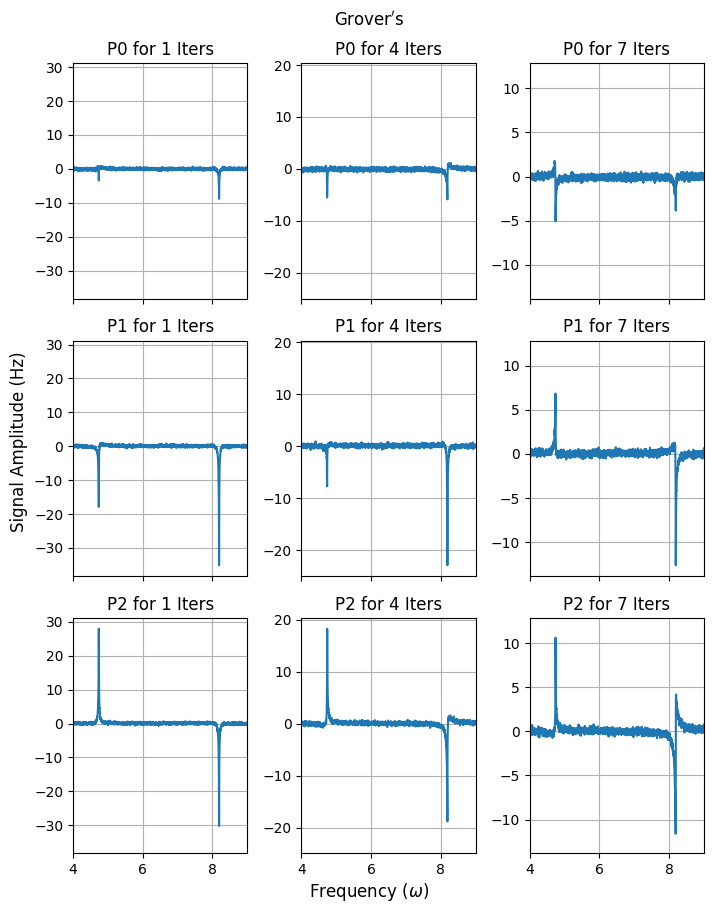

In [67]:
P0_G3_1 = pd.read_csv("/Users/shashank/Documents/Grover_s/Iter_1/P0_Grover3_Iter1.csv", header = None)
P1_G3_1 = pd.read_csv("/Users/shashank/Documents/Grover_s/Iter_1/P1_Grover3_Iter1.csv", header = None)
P2_G3_1 = pd.read_csv("/Users/shashank/Documents/Grover_s/Iter_1/P2_Grover3_Iter1.csv", header = None)

freq_P0_G3_1 = np.array(P0_G3_1.iloc[:,0])
spec_P0_G3_1 = np.array(P0_G3_1.iloc[:,1])

freq_P1_G3_1 = np.array(P1_G3_1.iloc[:,0])
spec_P1_G3_1 = np.array(P1_G3_1.iloc[:,1])

freq_P2_G3_1 = np.array(P2_G3_1.iloc[:,0])
spec_P2_G3_1 = np.array(P2_G3_1.iloc[:,1])

P0_G3_4 = pd.read_csv("/Users/shashank/Documents/Grover_s/Iter_4/P0_Grover3_Iter4.csv", header = None)
P1_G3_4 = pd.read_csv("/Users/shashank/Documents/Grover_s/Iter_4/P1_Grover3_Iter4.csv", header = None)
P2_G3_4 = pd.read_csv("/Users/shashank/Documents/Grover_s/Iter_4/P2_Grover3_Iter4.csv", header = None)

freq_P0_G3_4 = np.array(P0_G3_4.iloc[:,0])
spec_P0_G3_4 = np.array(P0_G3_4.iloc[:,1])

freq_P1_G3_4 = np.array(P1_G3_4.iloc[:,0])
spec_P1_G3_4 = np.array(P1_G3_4.iloc[:,1])

freq_P2_G3_4 = np.array(P2_G3_4.iloc[:,0])
spec_P2_G3_4 = np.array(P2_G3_4.iloc[:,1])

P0_G3_7 = pd.read_csv("/Users/shashank/Documents/Grover_s/Iter_7/P0_Grover3_Iter7.csv", header = None)
P1_G3_7 = pd.read_csv("/Users/shashank/Documents/Grover_s/Iter_7/P1_Grover3_Iter7.csv", header = None)
P2_G3_7 = pd.read_csv("/Users/shashank/Documents/Grover_s/Iter_7/P2_Grover3_Iter7.csv", header = None)

freq_P0_G3_7 = np.array(P0_G3_7.iloc[:,0])
spec_P0_G3_7 = np.array(P0_G3_7.iloc[:,1])

freq_P1_G3_7 = np.array(P1_G3_7.iloc[:,0])
spec_P1_G3_7 = np.array(P1_G3_7.iloc[:,1])

freq_P2_G3_7 = np.array(P2_G3_7.iloc[:,0])
spec_P2_G3_7 = np.array(P2_G3_7.iloc[:,1])

loc_P0_G3_1, int_P0_G3_1  = integrator(freq_P0_G3_1 , spec_P0_G3_1, 3, 9)
loc_P1_G3_1, int_P1_G3_1  = integrator(freq_P1_G3_1 , spec_P1_G3_1, 3, 9)
loc_P2_G3_1, int_P2_G3_1  = integrator(freq_P2_G3_1 , spec_P2_G3_1, 3, 9)

loc_P0_G3_4, int_P0_G3_4  = integrator(freq_P0_G3_4 , spec_P0_G3_4, 3, 9, 0.6)
loc_P1_G3_4, int_P1_G3_4  = integrator(freq_P1_G3_4 , spec_P1_G3_4, 3, 9, 0.4)
loc_P2_G3_4, int_P2_G3_4 =  integrator(freq_P2_G3_4 , spec_P2_G3_4, 3, 9, 0.6)

loc_P0_G3_7, int_P0_G3_7  = integrator(freq_P0_G3_7 , spec_P0_G3_7, 3, 9, 0.6)
loc_P1_G3_7, int_P1_G3_7  = integrator(freq_P1_G3_7 , spec_P1_G3_7, 3, 9, 0.4)
loc_P2_G3_7, int_P2_G3_7 =  integrator(freq_P2_G3_7 , spec_P2_G3_7, 3, 9, 0.8)

plt.rcParams['axes.grid'] = True
fig, ax = plt.subplots(3, 3, sharey = 'col', sharex = 'all', figsize = (7,9))
fig.suptitle('Grover$\'$s', fontsize=12)
ax[0,0].set_xlim(4, 9)
ax[0,0].plot(freq_P0_G3_1, spec_P0_G3_1)
ax[0,0].title.set_text("P0 for 1 Iters")
ax[1,0].plot(freq_P1_G3_1, spec_P1_G3_1)
ax[1,0].title.set_text("P1 for 1 Iters")
ax[2,0].plot(freq_P2_G3_1, spec_P2_G3_1)
ax[2,0].title.set_text("P2 for 1 Iters")

ax[0,1].plot(freq_P0_G3_4, spec_P0_G3_4)
ax[0,1].title.set_text("P0 for 4 Iters")
ax[1,1].plot(freq_P1_G3_4, spec_P1_G3_4)
ax[1,1].title.set_text("P1 for 4 Iters")
ax[2,1].plot(freq_P2_G3_4, spec_P2_G3_4)
ax[2,1].title.set_text("P2 for 4 Iters")

ax[0,2].plot(freq_P0_G3_7, spec_P0_G3_7)
ax[0,2].title.set_text("P0 for 7 Iters")
ax[1,2].plot(freq_P1_G3_7, spec_P1_G3_7)
ax[1,2].title.set_text("P1 for 7 Iters")
ax[2,2].plot(freq_P2_G3_7, spec_P2_G3_7)
ax[2,2].title.set_text("P2 for 7 Iters")

fig.text(0.5, 0, 'Frequency ($\omega$)', ha='center', va='center', fontsize = 12)
fig.text(0, 0.5, 'Signal Amplitude (Hz)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.tight_layout()
plt.show()

### Truth Table

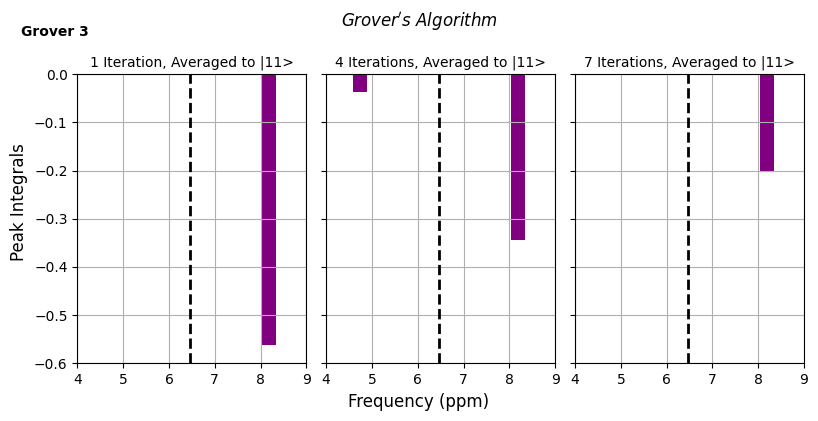

In [48]:
fig1, ax1 = plt.subplots(1, 3, sharex = 'all', sharey = 'all', figsize = (8,4))
fig1.suptitle('Grover$\'$s Algorithm', fontsize=12, style = 'italic')
ax1[0].set_xlim(4, 9)
ax1[0].set_ylim(-0.6, 0)
ax1[0].bar(loc_P0_G3_1, (int_P0_G3_1 + int_P1_G3_1 + int_P2_G3_1)/3, color = 'purple', width = 0.3)
ax1[0].axvline(x = 6.46, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[0].set_title("1 Iteration, Averaged to |11>", size=10)
ax1[1].bar(loc_P0_G3_4, (int_P0_G3_4 + int_P1_G3_4 + int_P2_G3_4)/3, color = 'purple', width = 0.3)
ax1[1].axvline(x = 6.46, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[1].set_title("4 Iterations, Averaged to |11>", size=10)
ax1[2].bar(loc_P0_G3_7, (int_P0_G3_7 + int_P1_G3_7 + int_P2_G3_7)/3, color = 'purple', width = 0.3)
ax1[2].axvline(x = 6.46, linestyle = 'dashed', linewidth = 2, color = 'black')
ax1[2].set_title("7 Iterations, Averaged to |11>", size=10)

fig1.text(0.045 , 0.925,  'Grover 3', fontweight = 'bold', ha='center', va='center', fontsize = 10)
fig1.text(0.5, 0, 'Frequency (ppm)', ha='center', va='center', fontsize = 12)
fig1.text(0, 0.5, 'Peak Integrals', ha='center', va='center', rotation='vertical', fontsize = 12)
fig1.tight_layout()
plt.show()